In [1]:
#Imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
#Read in COVID CSV formatted datasets into Pandas Dataframes
states = pd.read_csv('4.18states.csv')
abridged_counties = pd.read_csv('abridged_couties.csv')
time_series_confirmed_us = pd.read_csv('time_series_covid19_confirmed_US.csv')
time_series_deaths_us = pd.read_csv('time_series_covid19_deaths_US.csv')

**Data Cleaning Phase**

**Part 1 Load the Tables into CSV Format**

In [3]:
#States table
print(states.shape[0], "rows")
print(states.shape[1], "columns")

states.head()

140 rows
18 columns


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-18 22:32:47,32.3182,-86.9023,4712,153,NaN,4559.0,1.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895
1,Alaska,US,2020-04-18 22:32:47,61.3707,-152.4044,314,9,147.0,305.0,2.0,52.530410,9655.0,39.0,2.866242,84000002,USA,1615.226458,12.420382
2,American Samoa,US,NaN,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16,ASM,5.391708,NaN
3,Arizona,US,2020-04-18 22:32:47,33.7298,-111.4312,4724,180,539.0,4544.0,4.0,64.901548,51045.0,566.0,3.810330,84000004,USA,701.291175,11.981372
4,Arkansas,US,2020-04-18 22:32:47,34.9697,-92.3731,1744,38,703.0,1706.0,5.0,67.361213,24141.0,291.0,2.178899,84000005,USA,932.435235,16.685780


In [8]:
#Abridged counties table
print(abridged_counties.shape[0], "rows")
print(abridged_counties.shape[1], "columns")

abridged_counties.head()

3244 rows
87 columns


,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,CensusRegionName,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",3-YrDiabetes2015-17,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,...,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,3-YrMortalityAge<1Year2015-17,3-YrMortalityAge1-4Years2015-17,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,South,East South Central,2.0,55601.0,27007.0,28497.0,0.486578,8392.0,91.8,54571.0,37.0,11439.0,8046.0,16.0,9.9,204.5,56.1,18.081557,81.79,324.0,50.0,0.0,1.0,6.0,0.326656,1866.0,1713.0,2001.0,1990.0,2171.0,...,1594.0,1736.0,3978.0,4265.0,4040.0,4165.0,1524.0,1559.0,1279.0,1498.0,1821.0,2192.0,841.0,1141.0,159.0,392.0,NaN,NaN,NaN,NaN,10.0,20.0,44.0,73.0,112.0,143.0,109.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,South,East South Central,3.0,218022.0,103225.0,109403.0,0.485472,42413.0,114.7,182265.0,41.1,54145.0,41590.0,33.0,8.5,183.2,41.9,17.489033,54.28,2101.0,536.0,0.0,3.0,51.0,0.253255,5614.0,5544.0,5832.0,5767.0,6076.0,...,5317.0,5392.0,11620.0,11933.0,13047.0,13874.0,5943.0,6580.0,5728.0,6284.0,8558.0,9245.0,4379.0,5153.0,1176.0,2057.0,13.0,NaN,NaN,23.0,30.0,52.0,125.0,262.0,434.0,546.0,597.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,South,East South Central,6.0,24881.0,13335.0,11935.0,0.527701,4757.0,31.0,27457.0,39.0,6681.0,4706.0,NaN,15.7,220.4,49.0,21.999985,69.82,181.0,12.0,0.0,1.0,5.0,0.893106,847.0,855.0,826.0,816.0,820.0,...,1162.0,646.0,2115.0,1513.0,2164.0,1854.0,910.0,907.0,859.0,940.0,1067.0,1171.0,498.0,730.0,129.0,314.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,44.0,65.0,72.0,68.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,South,East South Central,1.0,22400.0,12138.0,10530.0,0.535469,3632.0,36.8,22915.0,37.8,5128.0,3389.0,NaN,13.3,225.5,57.2,19.114200,84.49,145.0,16.0,0.0,1.0,0.0,0.278124,712.0,666.0,759.0,646.0,771.0,...,1013.0,633.0,1895.0,1487.0,1883.0,1503.0,734.0,667.0,684.0,650.0,803.0,920.0,370.0,534.0,73.0,206.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,37.0,62.0,56.0,45.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,South,East South Central,1.0,57840.0,28607.0,29406.0,0.493114,10351.0,88.9,57322.0,39.0,13175.0,9542.0,NaN,14.9,224.8,52.8,19.208672,87.05,103.0,18.0,1.0,1.0,6.0,0.094317,1805.0,1811.0,1936.0,1944

In [9]:
#Time Series Confirmed Cases US
print(time_series_confirmed_us.shape[0], "rows")
print(time_series_confirmed_us.shape[1], "columns")

time_series_confirmed_us.head()

3255 rows
99 columns


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,3,5,12,14,15,27,29,32,37,45,51,55,56,58,69,77,82,84,93,112,113,121,121,128,130,133,133,133,133,135,135,136,136
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,6,8,8,8,8,8,11,11,11,11,11,11,11,13,13,13,14
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,5,5,5,14,21,23,31,39,51,64,79,100,127,174,239,286,316,316,452,475,513,573,620,683,725,788,897,903,923,974,1043,1068,1118
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,3,3,6,6,7,17,17,17,19,22,23,30,30,30,30,37,40,42,43,43,45,45,50,51,51,51,51,51,51,51,53


In [10]:
#Time Series Confirmed Deaths US
print(time_series_deaths_us.shape[0], "rows")
print(time_series_deaths_us.shape[1], "columns")

time_series_deaths_us.head()

3255 rows
100 columns


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",55641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",164229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",55144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",2933408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,2,2,3,3,3,6,8,11,12,15,18,20,21,23,24,33,39,42,44,45,45,51,56,58,60
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",107268,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,2,3


**Part 2: Understand Null Values in Tables and Impute them Accordingly**

In [11]:
#Which columns have the most null values in the states table?
states_null = states.isnull().sum().sort_values(ascending = False)
states_null

Hospitalization_Rate    91
People_Hospitalized     91
People_Tested           84
Testing_Rate            84
Last_Update             83
FIPS                    82
Recovered               24
Long_                    5
Lat                      5
Incident_Rate            5
Mortality_Rate           3
Active                   1
Confirmed                0
Deaths                   0
UID                      0
ISO3                     0
Country_Region           0
Province_State           0
dtype: int64

In [12]:
#Which columns have the most null values in the abridged counties table?
abridged_counties_null = abridged_counties.isnull().sum().sort_values(ascending = False).head(20)
abridged_counties_null

3-YrMortalityAge1-4Years2015-17      3179
mortality2015-17Estimated            3149
3-YrMortalityAge5-14Years2015-17     3149
3-YrMortalityAge<1Year2015-17        2772
3-YrMortalityAge15-24Years2015-17    2610
3-YrMortalityAge25-34Years2015-17    2270
3-YrMortalityAge35-44Years2015-17    1916
3-YrDiabetes2015-17                  1744
HPSAUnderservedPop                   1141
HPSAServedPop                        1141
HPSAShortage                         1141
3-YrMortalityAge45-54Years2015-17    1071
stay at home                          592
3-YrMortalityAge55-64Years2015-17     492
3-YrMortalityAge65-74Years2015-17     330
3-YrMortalityAge75-84Years2015-17     237
>500 gatherings                       221
>50 gatherings                        221
3-YrMortalityAge85+Years2015-17       181
State                                 169
dtype: int64

In [13]:
#Which columns have the most null values in the Time Series Confirmed Cases US table?
time_series_confirmed_us_null = time_series_confirmed_us.isnull().sum().sort_values(ascending = False)
time_series_confirmed_us_null

Admin2     7
FIPS       4
4/18/20    0
2/16/20    0
2/7/20     0
          ..
3/19/20    0
3/20/20    0
3/21/20    0
3/22/20    0
UID        0
Length: 99, dtype: int64

In [14]:
#Let's explore the null values in the "Admin2" column
#Null values corresponding to first few rows

time_series_confirmed_us['Admin2'].head(20) 
time_series_confirmed_us.loc[0:10, :]

#The 'Admin2' column 'NaN' values corresspond to American territories.
#This is because they don't have counties like the states of the U.S. do.
#Thus, we can simply impute the 'NaN' values to 'No County'.

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,3,5,12,14,15,27,29,32,37,45,51,55,56,58,69,77,82,84,93,112,113,121,121,128,130,133,133,133,133,135,135,136,136
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,6,8,8,8,8,8,11,11,11,11,11,11,11,13,13,13,14
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,"Puerto Rico, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,5,5,5,14,21,23,31,39,51,64,79,100,127,174,239,286,316,316,452,475,513,573,620,683,725,788,897,903,923,974,1043,1068,1118
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,"Virgin Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,3,3,6,6,7,17,17,17,19,22,23,30,30,30,30,37,40,42,43,43,45,45,50,51,51,51,51,51,51,51,53
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,6,6,6,6,6,7,8,10,12,12,12,12,12,12,15,17,19,19,19,23,24,26,26,25
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1,2,2,2,3,4,4,5,5,10,15,18,19,20,24,28,29,29,38,42,44,56,59,66,71,72,87,91,101,103,109
7,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,3,3,4,9,9,10,10,11,12,14,15,18
8,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,3,4,4,4,5,7,8,9,9,11,13,16,17,17,18,22,24,26
9,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,4,5,5,5,5,5,6,9,10,10,10,10,10,11,12,12,13,14,16,17,18,20,20


In [0]:
#Impute the NaN values with 'No County'

time_series_confirmed_us.iloc[0:5, 5] = 'No County' 

In [16]:
#'No County' values have been inserted

time_series_confirmed_us.loc[0:10, :] 

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,No County,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,No County,Guam,US,13.444300,144.793700,"Guam, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,3,5,12,14,15,27,29,32,37,45,51,55,56,58,69,77,82,84,93,112,113,121,121,128,130,133,133,133,133,135,135,136,136
2,580,MP,MNP,580,69.0,No County,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,6,8,8,8,8,8,11,11,11,11,11,11,11,13,13,13,14
3,630,PR,PRI,630,72.0,No County,Puerto Rico,US,18.220800,-66.590100,"Puerto Rico, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,5,5,5,14,21,23,31,39,51,64,79,100,127,174,239,286,316,316,452,475,513,573,620,683,725,788,897,903,923,974,1043,1068,1118
4,850,VI,VIR,850,78.0,No County,Virgin Islands,US,18.335800,-64.896300,"Virgin Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,3,3,6,6,7,17,17,17,19,22,23,30,30,30,30,37,40,42,43,43,45,45,50,51,51,51,51,51,51,51,53
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,6,6,6,6,6,7,8,10,12,12,12,12,12,12,15,17,19,19,19,23,24,26,26,25
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1,2,2,2,3,4,4,5,5,10,15,18,19,20,24,28,29,29,38,42,44,56,59,66,71,72,87,91,101,103,109
7,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,3,3,4,9,9,10,10,11,12,14,15,18
8,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,3,4,4,4,5,7,8,9,9,11,13,16,17,17,18,22,24,26
9,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,4,5,5,5,5,5,6,9,10,10,10,10,10,11,12,12,13,14,16,17,18,20,20


In [17]:
#Let's explore the null values in the "FIPS" column

time_series_confirmed_us[time_series_confirmed_us['FIPS'].isnull()] 

#Some additional exploration may be needed to understand the values within the FIPS column

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
3147,84070002,US,USA,840,NaN,Dukes and Nantucket,Massachusetts,US,41.406747,-70.687635,"Dukes and Nantucket,Massachusetts,US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,3,3,4,8,8,8,8,11,12,16,16,17,17,18,17,18,21,21,21,21,21,20,21,21,23
3148,84070003,US,USA,840,NaN,Kansas City,Missouri,US,39.099700,-94.578600,"Kansas City,Missouri,US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6,12,12,13,17,21,43,64,78,94,102,100,119,128,139,139,172,172,212,234,234,249,300,300,308,329,346,351,386,401,412
3253,84070004,US,USA,840,NaN,Michigan Department of Corrections (MDOC),Michigan,US,0.000000,0.000000,"Michigan Department of Corrections (MDOC), Mic...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,370,429,472,472,514,550
3254,84070005,US,USA,840,NaN,Federal Correctional Institution (FCI),Michigan,US,0.000000,0.000000,"Federal Correctional Institution (FCI), Michig...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,23,36,36,44,45


In [18]:
#It appears to be some kind of quantitative continuous ID.
#Additionally, there appears to be only 4 null values in a series of 3254 elements
#As a result, it is most likely safe to impute these values as they are most likely 
#unlikely to affect predictions very much.
#Thus, it is safe to assume that it is appropriate to impute these 'NaN' values to 0

time_series_confirmed_us['FIPS'] 

0          60.0
1          66.0
2          69.0
3          72.0
4          78.0
         ...   
3250    90055.0
3251    90056.0
3252    99999.0
3253        NaN
3254        NaN
Name: FIPS, Length: 3255, dtype: float64

In [0]:
#Impute the 'NaN' values in the FIPS column to 0

time_series_confirmed_us.loc[time_series_confirmed_us['FIPS'].isnull(), 'FIPS'] = 0

In [20]:
#Notice the 'NaN' in rows 3253 and 3254 respectively have been changed to 0.0 respectively.

time_series_confirmed_us['FIPS']

0          60.0
1          66.0
2          69.0
3          72.0
4          78.0
         ...   
3250    90055.0
3251    90056.0
3252    99999.0
3253        0.0
3254        0.0
Name: FIPS, Length: 3255, dtype: float64

In [21]:
#Which columns have the most null values in the Time Series Confirmed Deaths US table?
#Based on how the series appears, using the same imputation stategy used for the previous
#table is appropriate.
#This table looks similar to the previously data cleaned table

time_series_deaths_us_null = time_series_deaths_us.isnull().sum().sort_values(ascending = False)
time_series_deaths_us_null

Admin2     7
FIPS       4
4/18/20    0
2/16/20    0
2/6/20     0
          ..
3/19/20    0
3/20/20    0
3/21/20    0
3/22/20    0
UID        0
Length: 100, dtype: int64

In [0]:
#Impute the NaN values with 'No County'

time_series_deaths_us.iloc[0:5, 5] = 'No County' 

In [23]:
#'No County' values have been inserted

time_series_deaths_us.loc[0:10, :] 

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,No County,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",55641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,No County,Guam,US,13.444300,144.793700,"Guam, US",164229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,No County,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",55144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,No County,Puerto Rico,US,18.220800,-66.590100,"Puerto Rico, US",2933408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,2,2,3,3,3,6,8,11,12,15,18,20,21,23,24,33,39,42,44,45,45,51,56,58,60
4,850,VI,VIR,850,78.0,No County,Virgin Islands,US,18.335800,-64.896300,"Virgin Islands, US",107268,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,2,3
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",55869,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,2,2
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",223234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2
7,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",24686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",22394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",57826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
#Let's explore the null values in the "FIPS" column

time_series_deaths_us[time_series_deaths_us['FIPS'].isnull()] 

#Some additional exploration may be needed to understand the values within the FIPS column

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
3147,84070002,US,USA,840,NaN,Dukes and Nantucket,Massachusetts,US,41.406747,-70.687635,"Dukes and Nantucket,Massachusetts,US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
3148,84070003,US,USA,840,NaN,Kansas City,Missouri,US,39.099700,-94.578600,"Kansas City,Missouri,US",488943,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,0,5,7,7,8,8,8,8,12,12,12,13,13
3253,84070004,US,USA,840,NaN,Michigan Department of Corrections (MDOC),Michigan,US,0.000000,0.000000,"Michigan Department of Corrections (MDOC), Mic...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,9,12,12,15,17
3254,84070005,US,USA,840,NaN,Federal Correctional Institution (FCI),Michigan,US,0.000000,0.000000,"Federal Correctional Institution (FCI), Michig...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#Impute the 'NaN' values in the FIPS column to 0

time_series_deaths_us.loc[time_series_deaths_us['FIPS'].isnull(), 'FIPS'] = 0

In [26]:
#Notice the 'NaN' in rows 3253 and 3254 respectively have been changed to 0.0 respectively.

time_series_confirmed_us['FIPS']

0          60.0
1          66.0
2          69.0
3          72.0
4          78.0
         ...   
3250    90055.0
3251    90056.0
3252    99999.0
3253        0.0
3254        0.0
Name: FIPS, Length: 3255, dtype: float64

**Part 2: Explore Columns with Majority Null Values and Decide How to Impute Them**

This part consists of writing imputation functions to make data cleaning easier.

In [27]:
#Which columns have the most null values in the states table?
states_null = states.isnull().sum().sort_values(ascending = False)
states_null

Hospitalization_Rate    91
People_Hospitalized     91
People_Tested           84
Testing_Rate            84
Last_Update             83
FIPS                    82
Recovered               24
Long_                    5
Lat                      5
Incident_Rate            5
Mortality_Rate           3
Active                   1
Confirmed                0
Deaths                   0
UID                      0
ISO3                     0
Country_Region           0
Province_State           0
dtype: int64

In [28]:
#There appears to be the most null values in the
#'Hosptitalization_Rate' and 'People_Hospitalized' columns
#Let's explore them

#Null values in 'Hospitalization_Rate' column
states[states['Hospitalization_Rate'].isnull()] 

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
2,American Samoa,US,NaN,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16,ASM,5.391708,NaN
9,Diamond Princess,US,2020-04-18 22:32:47,NaN,NaN,49,0,0.0,49.0,88888.0,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN
13,Grand Princess,US,2020-04-18 22:32:47,NaN,NaN,103,0,0.0,103.0,99999.0,NaN,NaN,NaN,0.000000,84099999,USA,NaN,NaN
18,Indiana,US,2020-04-18 22:32:47,39.8494,-86.2583,10641,545,NaN,10096.0,18.0,162.607117,56873.0,NaN,5.121699,84000018,USA,869.086983,NaN
31,Nebraska,US,2020-04-18 22:32:47,41.1254,-98.2681,1249,24,NaN,1225.0,31.0,81.887034,13677.0,NaN,1.921537,84000031,USA,896.692524,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Xinjiang,China,NaN,41.1129,85.2401,76,3,73.0,0.0,NaN,0.305589,NaN,NaN,3.947368,15629,CHN,NaN,NaN
136,Yukon,Canada,NaN,64.2823,-135.0000,9,0,0.0,9.0,NaN,21.909538,NaN,NaN,0.000000,12412,CAN,NaN,NaN
137,Yunnan,China,NaN,24.9740,101.4870,184,2,177.0,5.0,NaN,0.380952,NaN,NaN,1.086957,15630,CHN,NaN,NaN
138,Zhejiang,China,NaN,29.1832,120.0934,1268,1,1246.0,21.0,NaN,2.210214,NaN,NaN,0.078864,15631,CHN,NaN,NaN


In [29]:
#Null values in 'People_Hospitalized' column

states[states['People_Hospitalized'].isnull()] 

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
2,American Samoa,US,NaN,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16,ASM,5.391708,NaN
9,Diamond Princess,US,2020-04-18 22:32:47,NaN,NaN,49,0,0.0,49.0,88888.0,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN
13,Grand Princess,US,2020-04-18 22:32:47,NaN,NaN,103,0,0.0,103.0,99999.0,NaN,NaN,NaN,0.000000,84099999,USA,NaN,NaN
18,Indiana,US,2020-04-18 22:32:47,39.8494,-86.2583,10641,545,NaN,10096.0,18.0,162.607117,56873.0,NaN,5.121699,84000018,USA,869.086983,NaN
31,Nebraska,US,2020-04-18 22:32:47,41.1254,-98.2681,1249,24,NaN,1225.0,31.0,81.887034,13677.0,NaN,1.921537,84000031,USA,896.692524,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Xinjiang,China,NaN,41.1129,85.2401,76,3,73.0,0.0,NaN,0.305589,NaN,NaN,3.947368,15629,CHN,NaN,NaN
136,Yukon,Canada,NaN,64.2823,-135.0000,9,0,0.0,9.0,NaN,21.909538,NaN,NaN,0.000000,12412,CAN,NaN,NaN
137,Yunnan,China,NaN,24.9740,101.4870,184,2,177.0,5.0,NaN,0.380952,NaN,NaN,1.086957,15630,CHN,NaN,NaN
138,Zhejiang,China,NaN,29.1832,120.0934,1268,1,1246.0,21.0,NaN,2.210214,NaN,NaN,0.078864,15631,CHN,NaN,NaN


In [0]:
#Let's define a few data cleaning functions to make this process easier


#Let's write a function to get the datatypes of each column
#FUNC getColumnDatatypes takes in a TABLE and RETURNS a Dictionary representing the mappings from
#columns of table to the datatype of those columns respectively.

def getColumnDatatypes(table):
    column_datatype_dict = {}
    columns_list = list(table.columns)
    table = table[np.logical_not(table.isnull())]
    
    for column in columns_list:
        column_datatype_dict[column] = type(table[column].iloc[0])
    return column_datatype_dict

#Let's write a function to replace the null values of each column with either the mean or the median
#(if skewed) of the non-null values of each column respectively.
#FUNC imputeQuantitativeNullValues takes in a TABLE and type_dictionary RETURNS a 
#the TABLE with appropriately imputed values

def imputeQuantitativeNullValues(table, type_dictionary):
    quantitative_columns_list = list(type_dictionary.keys())
    table_non_null = table.fillna(673)
    mean = 0
    median = 0
    
    for column in quantitative_columns_list:
        if type_dictionary[column] == np.float64:
            if np.mean(table_non_null[column]) != np.median(table_non_null[column]):
                table_wout_null = table_non_null[table_non_null[column] != 673]
                median = np.median(table_wout_null[column])
                table.loc[table[column].isnull(), column] = median
            elif np.mean(table_non_null[column]) == np.median(table_non_null[column]):
                table_wout_null = table_non_null[table_non_null[column] != 673]
                mean = np.mean(table_wout_null[column])
                table.loc[table[column].isnull(), column] = mean
    return table
        
        
#Let's write a function to standardize the quantitative continuous variables
#FUNC standardizeQuantitativeVariables takes in a TABLE and type_dictionary and 
#RETURNS a TABLE with appropriately standardized quantitative values

    
def standardizeQuantitativeVariables(table, type_dictionary):
    quantitative_columns_list = list(type_dictionary.keys())
    quantitative_columns = []
    non_quantitative_columns = []
    for column in quantitative_columns_list:
        if type_dictionary[column] != np.float64:
            non_quantitative_columns.append(column)
        else:
            quantitative_columns.append(column)
    quant_table = table[quantitative_columns]
    normalized_table = (quant_table-np.mean(quant_table))/np.std(quant_table)
    table = table[non_quantitative_columns].join(normalized_table)
    return table

In [31]:
#Get the column datatypes of the states table

states_type_dictionary = getColumnDatatypes(states[states.isnull()])
states_type_dictionary

#All the are of the float datatype, so using means/medians as an imputer is appropriate

{'Active': numpy.float64,
 'Confirmed': numpy.float64,
 'Country_Region': float,
 'Deaths': numpy.float64,
 'FIPS': numpy.float64,
 'Hospitalization_Rate': numpy.float64,
 'ISO3': float,
 'Incident_Rate': numpy.float64,
 'Last_Update': float,
 'Lat': numpy.float64,
 'Long_': numpy.float64,
 'Mortality_Rate': numpy.float64,
 'People_Hospitalized': numpy.float64,
 'People_Tested': numpy.float64,
 'Province_State': float,
 'Recovered': numpy.float64,
 'Testing_Rate': numpy.float64,
 'UID': numpy.float64}

In [32]:
#Perform imputation on states table for quantitative continuous values in the states table

states_transformed = imputeQuantitativeNullValues(states, states_type_dictionary)
states_transformed

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-18 22:32:47,32.3182,-86.9023,4712.0,153.0,167.5,4559.0,1.0,100.492717,42538.0,620.0,3.247029,84000001.0,USA,907.206961,13.157895
1,Alaska,US,2020-04-18 22:32:47,61.3707,-152.4044,314.0,9.0,147.0,305.0,2.0,52.530410,9655.0,39.0,2.866242,84000002.0,USA,1615.226458,12.420382
2,American Samoa,US,NaN,-14.2710,-170.1320,0.0,0.0,167.5,131.0,60.0,0.000000,3.0,561.0,1.976285,16.0,ASM,5.391708,12.910798
3,Arizona,US,2020-04-18 22:32:47,33.7298,-111.4312,4724.0,180.0,539.0,4544.0,4.0,64.901548,51045.0,566.0,3.810330,84000004.0,USA,701.291175,11.981372
4,Arkansas,US,2020-04-18 22:32:47,34.9697,-92.3731,1744.0,38.0,703.0,1706.0,5.0,67.361213,24141.0,291.0,2.178899,84000005.0,USA,932.435235,16.685780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Xinjiang,China,NaN,41.1129,85.2401,76.0,3.0,73.0,0.0,32.5,0.305589,38174.0,561.0,3.947368,15629.0,CHN,1025.328233,12.910798
136,Yukon,Canada,NaN,64.2823,-135.0000,9.0,0.0,0.0,9.0,32.5,21.909538,38174.0,561.0,0.000000,12412.0,CAN,1025.328233,12.910798
137,Yunnan,China,NaN,24.9740,101.4870,184.0,2.0,177.0,5.0,32.5,0.380952,38174.0,561.0,1.086957,15630.0,CHN,1025.328233,12.910798
138,Zhejiang,China,NaN,29.1832,120.0934,1268.0,1.0,1246.0,21.0,32.5,2.210214,38174.0,561.0,0.078864,15631.0,CHN,1025.328233,12.910798


In [33]:
#Standardize the quantitative continuous variables in the states table
states_transformed_standardized = standardizeQuantitativeVariables(states_transformed, states_type_dictionary)
states_transformed_standardized

,Province_State,Country_Region,Last_Update,ISO3,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-18 22:32:47,USA,0.115768,-0.709900,-0.062481,-0.105392,-0.173087,-0.005872,-0.122983,-0.001144,-0.112137,-0.121104,0.294315,1.261862,-0.454278,-0.044864
1,Alaska,US,2020-04-18 22:32:47,USA,1.390725,-1.379784,-0.254973,-0.196133,-0.175691,-0.202782,-0.122894,-0.277562,-0.660289,-0.246942,0.141516,1.261862,1.133748,-0.225182
2,American Samoa,US,NaN,ASM,-1.928778,-1.561082,-0.268716,-0.201805,-0.173087,-0.210836,-0.117726,-0.580308,-0.821185,-0.133883,-0.215597,-0.792607,-2.476971,-0.105278
3,Arizona,US,2020-04-18 22:32:47,USA,0.177716,-0.960755,-0.061956,-0.088378,-0.125898,-0.006567,-0.122716,-0.206264,0.029672,-0.132800,0.520351,1.261862,-0.916129,-0.332518
4,Arkansas,US,2020-04-18 22:32:47,USA,0.232128,-0.765850,-0.192385,-0.177859,-0.105067,-0.137932,-0.122627,-0.192089,-0.418811,-0.192362,-0.134294,1.261862,-0.397693,0.817685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Xinjiang,China,NaN,CHN,0.501720,1.050583,-0.265390,-0.199914,-0.185091,-0.216900,-0.120176,-0.578546,-0.184884,-0.133883,0.575340,-0.792225,-0.189342,-0.105278
136,Yukon,Canada,NaN,CAN,1.518499,-1.201791,-0.268322,-0.201805,-0.194364,-0.216483,-0.120176,-0.454038,-0.184884,-0.133883,-1.008621,-0.792304,-0.189342,-0.105278
137,Yunnan,China,NaN,CHN,-0.206529,1.216739,-0.260663,-0.200544,-0.171881,-0.216669,-0.120176,-0.578112,-0.184884,-0.133883,-0.572458,-0.792225,-0.189342,-0.105278
138,Zhejiang,China,NaN,CHN,-0.021810,1.407025,-0.213218,-0.201174,-0.036093,-0.215928,-0.120176,-0.567570,-0.184884,-0.133883,-0.976975,-0.792225,-0.189342,-0.105278


In [0]:
#The 'LastUpdate' column doesn't appear to be particularly useful in regards to summary information regarding
#individual states and territories of interest. So let's remove it from states_transformed and 
#states_transformed_standardized

states_transformed = states_transformed.drop(columns = ['Last_Update'])

states_transformed_standardized = states_transformed_standardized.drop(columns = ['Last_Update'])

In [0]:
#Which columns have the most null values in the abridged counties table?
abridged_counties_null = abridged_counties.isnull().sum().sort_values(ascending = False).head(20)


In [36]:
#Get the column datatypes of the abridged_counties table

abridged_counties_type_dictionary = getColumnDatatypes(abridged_counties[abridged_counties.isnull()])
abridged_counties_type_dictionary

#All the are of the float datatype, so using means/medians as an imputer is appropriate

{'#EligibleforMedicare2018': numpy.float64,
 '#FTEHospitalTotal2017': numpy.float64,
 '#HospParticipatinginNetwork2017': numpy.float64,
 '#Hospitals': numpy.float64,
 '#ICU_beds': numpy.float64,
 '3-YrDiabetes2015-17': numpy.float64,
 '3-YrMortalityAge1-4Years2015-17': numpy.float64,
 '3-YrMortalityAge15-24Years2015-17': numpy.float64,
 '3-YrMortalityAge25-34Years2015-17': numpy.float64,
 '3-YrMortalityAge35-44Years2015-17': numpy.float64,
 '3-YrMortalityAge45-54Years2015-17': numpy.float64,
 '3-YrMortalityAge5-14Years2015-17': numpy.float64,
 '3-YrMortalityAge55-64Years2015-17': numpy.float64,
 '3-YrMortalityAge65-74Years2015-17': numpy.float64,
 '3-YrMortalityAge75-84Years2015-17': numpy.float64,
 '3-YrMortalityAge85+Years2015-17': numpy.float64,
 '3-YrMortalityAge<1Year2015-17': numpy.float64,
 '>50 gatherings': numpy.float64,
 '>500 gatherings': numpy.float64,
 'COUNTYFP': numpy.float64,
 'CensusDivisionName': float,
 'CensusPopulation2010': numpy.float64,
 'CensusRegionName': floa

In [37]:
#Perform imputation on abridged_counties table for the quantitative continuous values

abridged_counties_transformed = imputeQuantitativeNullValues(abridged_counties, abridged_counties_type_dictionary)
abridged_counties_transformed.head()


,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,CensusRegionName,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",3-YrDiabetes2015-17,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,...,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,3-YrMortalityAge<1Year2015-17,3-YrMortalityAge1-4Years2015-17,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,South,East South Central,2.0,55601.0,27007.0,28497.0,0.486578,8392.0,91.8,54571.0,37.0,11439.0,8046.0,16.0,9.9,204.5,56.1,18.081557,81.79,324.0,50.0,0.0,1.0,6.0,0.326656,1866.0,1713.0,2001.0,1990.0,2171.0,...,1594.0,1736.0,3978.0,4265.0,4040.0,4165.0,1524.0,1559.0,1279.0,1498.0,1821.0,2192.0,841.0,1141.0,159.0,392.0,21.0,15.0,17.0,21.0,10.0,20.0,44.0,73.0,112.0,143.0,109.0,480.945237,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,1.84,4500.0,5750.0
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,South,East South Central,3.0,218022.0,103225.0,109403.0,0.485472,42413.0,114.7,182265.0,41.1,54145.0,41590.0,33.0,8.5,183.2,41.9,17.489033,54.28,2101.0,536.0,0.0,3.0,51.0,0.253255,5614.0,5544.0,5832.0,5767.0,6076.0,...,5317.0,5392.0,11620.0,11933.0,13047.0,13874.0,5943.0,6580.0,5728.0,6284.0,8558.0,9245.0,4379.0,5153.0,1176.0,2057.0,13.0,15.0,17.0,23.0,30.0,52.0,125.0,262.0,434.0,546.0,597.0,480.945237,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,1.84,4500.0,5750.0
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,South,East South Central,6.0,24881.0,13335.0,11935.0,0.527701,4757.0,31.0,27457.0,39.0,6681.0,4706.0,23.0,15.7,220.4,49.0,21.999985,69.82,181.0,12.0,0.0,1.0,5.0,0.893106,847.0,855.0,826.0,816.0,820.0,...,1162.0,646.0,2115.0,1513.0,2164.0,1854.0,910.0,907.0,859.0,940.0,1067.0,1171.0,498.0,730.0,129.0,314.0,21.0,15.0,17.0,21.0,23.0,24.0,21.0,44.0,65.0,72.0,68.0,480.945237,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,South,East South Central,1.0,22400.0,12138.0,10530.0,0.535469,3632.0,36.8,22915.0,37.8,5128.0,3389.0,23.0,13.3,225.5,57.2,19.114200,84.49,145.0,16.0,0.0,1.0,0.0,0.278124,712.0,666.0,759.0,646.0,771.0,...,1013.0,633.0,1895.0,1487.0,1883.0,1503.0,734.0,667.0,684.0,650.0,803.0,920.0,370.0,534.0,73.0,206.0,21.0,15.0,17.0,21.0,23.0,24.0,24.0,37.0,62.0,56.0,45.0,480.945237,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,South,East South Central,1.0,57840.0,28607.0,29406.0,0.493114,10351.0,88.9,57322.0,39.0,13175.0,9542.0,23.0,14.9,224.8,52.8,19.208672,

In [38]:
#Standardize the quantitative continuous variables in the abridged_counties table
abridged_counties_standardized = \
 standardizeQuantitativeVariables(abridged_counties_transformed, abridged_counties_type_dictionary)

abridged_counties_standardized

,countyFIPS,CountyName,StateName,State,CensusRegionName,CensusDivisionName,STATEFP,COUNTYFP,lat,lon,POP_LATITUDE,POP_LONGITUDE,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",3-YrDiabetes2015-17,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,...,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,3-YrMortalityAge<1Year2015-17,3-YrMortalityAge1-4Years2015-17,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,Autauga,AL,Alabama,South,East South Central,-1.867482,-0.956225,-1.216038,0.455904,-0.900555,0.385788,-1.084223,-0.141649,-0.143175,-0.138675,-0.622869,-0.164839,-0.111288,-0.136375,-0.646363,-0.152881,-0.168056,-0.275504,-0.151874,0.436883,1.891738,0.179600,1.085356,-0.227650,-0.206044,-0.405395,-0.174622,-0.203878,-0.381665,-0.127434,-0.134486,-0.119020,-0.111689,-0.106089,...,-0.138307,-0.124608,-0.111276,-0.099812,-0.134678,-0.134176,-0.166698,-0.170118,-0.175826,-0.155510,-0.155494,-0.139456,-0.179183,-0.178237,-0.231448,-0.221905,-0.114550,-0.045765,-0.046316,-0.133236,-0.442551,-0.242136,-0.123694,-0.156872,-0.134618,-0.123974,-0.218165,-0.040409,1.463264,-0.426383,-1.231563,-0.693201,-0.158339,1.314425,NaN,NaN,-0.226876,-0.222378,-0.257063,-0.220613
1,01003,Baldwin,AL,Alabama,South,East South Central,-1.867482,-0.937460,-1.596897,0.359064,-1.222270,0.290839,-0.716005,0.352895,0.329807,0.346118,-0.672250,0.579756,-0.097941,0.277938,0.170940,0.655291,0.615712,-0.041682,-0.520527,-0.029508,0.228681,0.011993,-0.567233,0.045821,0.130330,-0.405395,0.613240,0.338978,-0.466712,0.223512,0.239695,0.245717,0.263012,0.256127,...,0.197587,0.204555,0.241339,0.249355,0.287199,0.302474,0.340660,0.359293,0.450196,0.444401,0.623471,0.538017,0.546393,0.401862,0.355341,0.261505,-0.523687,-0.045765,-0.046316,-0.059397,-0.027436,0.245887,0.425101,0.465869,0.664136,0.663077,0.428301,-0.040409,1.463264,-0.426383,-1.231563,-0.693201,-0.158339,1.314425,NaN,NaN,-0.998670,-0.222378,-0.257063,-0.220613
2,01005,Barbour,AL,Alabama,South,East South Central,-1.867482,-0.918695,-1.356829,0.567772,-1.008760,0.474442,0.388650,-0.235186,-0.228018,-0.237915,1.214461,-0.244396,-0.146722,-0.224348,-0.247678,-0.242922,-0.246097,-0.179225,1.375404,0.785035,1.060209,1.288001,0.366291,-0.249657,-0.232345,-0.405395,-0.174622,-0.215941,0.274653,-0.222849,-0.218289,-0.230888,-0.228157,-0.231404,...,-0.177282,-0.222745,-0.197238,-0.225126,-0.222548,-0.238110,-0.237193,-0.238865,-0.234924,-0.225454,-0.242675,-0.237528,-0.249525,-0.237664,-0.248758,-0.244551,-0.114550,-0.045765,-0.046316,-0.133236,-0.172726,-0.181133,-0.279525,-0.252424,-0.251206,-0.262635,-0.272478,-0.040409,1.463264,-0.426383,-1.231563,-0.693201,-0.158339,1.314425,NaN,NaN,1.746619,0.399039,-0.199159,0.387146
3,01007,Bibb,AL,Alabama,South,East South Central,-1.867482,-0.899931,-1.119029,0.412924,-0.813093,0.338360,-1.452441,-0.242740,-0.235446,-0.246334,1.561509,-0.26

In [39]:
#There appears to be some null values in the 'State' column.
abridged_counties_standardized.isnull().sum().sort_values(ascending = False)

foreign travel ban    3244
federal guidelines    3244
State                  169
CensusRegionName        98
CensusDivisionName      98
                      ... 
PopMale65-742010         0
PopFmle65-742010         0
PopMale75-842010         0
PopFmle75-842010         0
countyFIPS               0
Length: 87, dtype: int64

In [0]:
#From above, the 'federal guidelines' and 'foreign travel ban' columns had the same value of 
# 737500.0 and 737495.0 respectively, so they don't appears to be useful feature columns.
#Thus, we will drop these feature columns from both the transformed and the standardized
#abridged_counties tables:

abridged_counties_transformed = abridged_counties_transformed.drop( \
    columns = ['federal guidelines', 'foreign travel ban'])
abridged_counties_standardized = abridged_counties_standardized.drop( \
    columns = ['federal guidelines', 'foreign travel ban'])

In conclusion, in part 2, I created two tables each for the states table and abridged_counties respectively. The two kinds of tables I created were a transformed table(only null values imputed), and a standardized table(null values imputed as well as quantitative continuous features transformed). 

The simply transformed table will be used for data visualizations in the Exploratory Data Analysis phase to preserve the actual values for better interpretability, while the standardized table will be used for modeling in the Model Development Phase.

**Part 3: Use One-Hot Encoding for Appropriate Columns with Categorical Variables**

Here, I will be modifying the standardized table by getting the dummies of cateogorical variables, which will be useful as inputs in the model development phase. 

However, I will not be modifying the simply transformed table, the for ease of creating data visualizations in the Exploratory Data Analysis Phase. 

I will not be creating the transformed versions of the time_series_confirmed_us table and the time_series_deaths_us table, as it is already high dimensional with informative time series data on confirmed cases and deaths over time respectively.

In [0]:
#Let's define a function that can perform one_hot encoding for any table with cateogorical variables passed in

#FUNC getColumnDatatypes takes in a TABLE and RETURNS a Dictionary representing the mappings from
#columns of table to the datatype of those columns respectively.

def oneHotEncoding(table):
    return pd.get_dummies(table)

In [42]:
#Get the dummies of the states_transformed_standardized table

states_transformed_standardized = oneHotEncoding(states_transformed_standardized)
states_transformed_standardized

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate,Province_State_Alabama,Province_State_Alaska,Province_State_Alberta,Province_State_American Samoa,Province_State_Anguilla,Province_State_Anhui,Province_State_Arizona,Province_State_Arkansas,Province_State_Aruba,Province_State_Australian Capital Territory,Province_State_Beijing,Province_State_Bermuda,"Province_State_Bonaire, Sint Eustatius and Saba",Province_State_British Columbia,Province_State_British Virgin Islands,Province_State_California,Province_State_Cayman Islands,Province_State_Channel Islands,Province_State_Chongqing,Province_State_Colorado,Province_State_Connecticut,Province_State_Curacao,Province_State_Delaware,Province_State_Diamond Princess,Province_State_District of Columbia,Province_State_Falkland Islands (Malvinas),...,Country_Region_Netherlands,Country_Region_US,Country_Region_United Kingdom,ISO3_ABW,ISO3_AIA,ISO3_ASM,ISO3_AUS,ISO3_BES,ISO3_BLM,ISO3_BMU,ISO3_CAN,ISO3_CHN,ISO3_CUW,ISO3_CYM,ISO3_FLK,ISO3_FRO,ISO3_GBR,ISO3_GIB,ISO3_GLP,ISO3_GRL,ISO3_GUF,ISO3_GUM,ISO3_HKG,ISO3_IMN,ISO3_MAC,ISO3_MAF,ISO3_MNP,ISO3_MSR,ISO3_MTQ,ISO3_MYT,ISO3_NCL,ISO3_PRI,ISO3_PYF,ISO3_REU,ISO3_SPM,ISO3_SXM,ISO3_TCA,ISO3_USA,ISO3_VGB,ISO3_VIR
0,0.115768,-0.709900,-0.062481,-0.105392,-0.173087,-0.005872,-0.122983,-0.001144,-0.112137,-0.121104,0.294315,1.261862,-0.454278,-0.044864,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1.390725,-1.379784,-0.254973,-0.196133,-0.175691,-0.202782,-0.122894,-0.277562,-0.660289,-0.246942,0.141516,1.261862,1.133748,-0.225182,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,-1.928778,-1.561082,-0.268716,-0.201805,-0.173087,-0.210836,-0.117726,-0.580308,-0.821185,-0.133883,-0.215597,-0.792607,-2.476971,-0.105278,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.177716,-0.960755,-0.061956,-0.088378,-0.125898,-0.006567,-0.122716,-0.206264,0.029672,-0.132800,0.520351,1.261862,-0.916129,-0.332518,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.232128,-0.765850,-0.192385,-0.177859,-0.105067,-0.137932,-0.122627,-0.192089,-0.418811,-0.192362,-0.134294,1.261862,-0.397693,0.817685,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.501720,1.050583,-0.265390,-0.199914,-0.185091,-0.216900,-0.120176,-0.578546,-0.184884,-0.133883,0.575340,-0.792225,-0.189342,-0.105278,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
136,1.518499,-1.201791,-0.268322,-0.201805,-0.194364,-0.216483,-0.120176,-0.454038,-0.184884,-0.133883,-1.008621,-0.792304,-0.189342,-0.105278,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
137,-0.206529,1.216739,-0.260663,-0.200544,-0.171881,-0.216669,-0.120176,-0.578112,-0.184884,-0.133883,-0.572458,-0.792225,-0.189342,-0.105278,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
138,-0.021810,1.407025,-0.213218,-0.201174,-0.036093,-0.215928,-0.120176,-0.567570,-0.184884,-0.133883,-0.976975,-0.792225,-0.189342,-0.105278,0,0,0,0,0,0,0

In [43]:
abridged_counties_standardized.head()
abridged_counties_not_dummies = abridged_counties_standardized[['countyFIPS',
                                                               'StateName',
                                                               'State',
                                                               'CensusRegionName',
                                                               'CensusDivisionName']]
abridged_counties_dummies = oneHotEncoding(abridged_counties_standardized.iloc[:, 5:])
abridged_counties_dummies['CountyName'] = abridged_counties_standardized['CountyName']
abridged_counties_standardized = abridged_counties_not_dummies.join(abridged_counties_dummies)

abridged_counties_standardized.head()

,countyFIPS,StateName,State,CensusRegionName,CensusDivisionName,STATEFP,COUNTYFP,lat,lon,POP_LATITUDE,POP_LONGITUDE,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",3-YrDiabetes2015-17,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,PopFmle10-142010,...,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,3-YrMortalityAge<1Year2015-17,3-YrMortalityAge1-4Years2015-17,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop,CensusDivisionName_East North Central,CensusDivisionName_East South Central,CensusDivisionName_Middle Atlantic,CensusDivisionName_Mountain,CensusDivisionName_New England,CensusDivisionName_Pacific,CensusDivisionName_South Atlantic,CensusDivisionName_West North Central,CensusDivisionName_West South Central,CountyName
0,01001,AL,Alabama,South,East South Central,-1.867482,-0.956225,-1.216038,0.455904,-0.900555,0.385788,-1.084223,-0.141649,-0.143175,-0.138675,-0.622869,-0.164839,-0.111288,-0.136375,-0.646363,-0.152881,-0.168056,-0.275504,-0.151874,0.436883,1.891738,0.179600,1.085356,-0.227650,-0.206044,-0.405395,-0.174622,-0.203878,-0.381665,-0.127434,-0.134486,-0.119020,-0.111689,-0.106089,-0.101221,...,-0.175826,-0.155510,-0.155494,-0.139456,-0.179183,-0.178237,-0.231448,-0.221905,-0.114550,-0.045765,-0.046316,-0.133236,-0.442551,-0.242136,-0.123694,-0.156872,-0.134618,-0.123974,-0.218165,-0.040409,1.463264,-0.426383,-1.231563,-0.693201,-0.158339,1.314425,-0.226876,-0.222378,-0.257063,-0.220613,0,1,0,0,0,0,0,0,0,Autauga
1,01003,AL,Alabama,South,East South Central,-1.867482,-0.937460,-1.596897,0.359064,-1.222270,0.290839,-0.716005,0.352895,0.329807,0.346118,-0.672250,0.579756,-0.097941,0.277938,0.170940,0.655291,0.615712,-0.041682,-0.520527,-0.029508,0.228681,0.011993,-0.567233,0.045821,0.130330,-0.405395,0.613240,0.338978,-0.466712,0.223512,0.239695,0.245717,0.263012,0.256127,0.260373,...,0.450196,0.444401,0.623471,0.538017,0.546393,0.401862,0.355341,0.261505,-0.523687,-0.045765,-0.046316,-0.059397,-0.027436,0.245887,0.425101,0.465869,0.664136,0.663077,0.428301,-0.040409,1.463264,-0.426383,-1.231563,-0.693201,-0.158339,1.314425,-0.998670,-0.222378,-0.257063,-0.220613,0,1,0,0,0,0,0,0,0,Baldwin
2,01005,AL,Alabama,South,East South Central,-1.867482,-0.918695,-1.356829,0.567772,-1.008760,0.474442,0.388650,-0.235186,-0.228018,-0.237915,1.214461,-0.244396,-0.146722,-0.224348,-0.247678,-0.242922,-0.246097,-0.179225,1.375404,0.785035,1.060209,1.288001,0.366291,-0.249657,-0.232345,-0.405395,-0.174622,-0.215941,0.274653,-0.222849,-0.218289,-0.230888,-0.228157,-0.231404,-0.231088,...,-0.234924,-0.225454,-0.242675,-0.237528,-0.249525,-0.237664,-0.248758,-0.244551,-0.114550,-0.045765,-0.046316,-0.133236,-0.172726,-0.181133,-0.279525,-0.252424,-0.251206,-0.262635,-0.272478,-0.040409,1.463264,-0.426383,-1.231563,-0.693201,-0.158339,1.314425,1.746619,0.399039,-0.199159,0.387146,0,1,0,0,0,0,0,0,0,Barbour
3,01007,AL,Alabama,South,East South Central,-1.867482,-0.899931,-1.119029,0.412924,-0.813093,0.338360,-1.452441,-0.242740,-0.235446,-0.246334,1.561509,-0.269018,-0.143342,-0.239085,-0.

Let's first examine how the states_transformed, abridged_counties_transformed, time_series_confirmed_us, and time_series_deaths_us tables look after the data cleaning phase.

In [44]:
#states_transformed table

print(states_transformed.shape)
states_transformed.head()

(140, 17)


,Province_State,Country_Region,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,32.3182,-86.9023,4712.0,153.0,167.5,4559.0,1.0,100.492717,42538.0,620.0,3.247029,84000001.0,USA,907.206961,13.157895
1,Alaska,US,61.3707,-152.4044,314.0,9.0,147.0,305.0,2.0,52.530410,9655.0,39.0,2.866242,84000002.0,USA,1615.226458,12.420382
2,American Samoa,US,-14.2710,-170.1320,0.0,0.0,167.5,131.0,60.0,0.000000,3.0,561.0,1.976285,16.0,ASM,5.391708,12.910798
3,Arizona,US,33.7298,-111.4312,4724.0,180.0,539.0,4544.0,4.0,64.901548,51045.0,566.0,3.810330,84000004.0,USA,701.291175,11.981372
4,Arkansas,US,34.9697,-92.3731,1744.0,38.0,703.0,1706.0,5.0,67.361213,24141.0,291.0,2.178899,84000005.0,USA,932.435235,16.685780


In [45]:
#abridged_counties_transformed table

print(abridged_counties_transformed.shape)
abridged_counties_transformed.head()

(3244, 85)


,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,CensusRegionName,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",3-YrDiabetes2015-17,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,...,PopMale25-292010,PopFmle25-292010,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,3-YrMortalityAge<1Year2015-17,3-YrMortalityAge1-4Years2015-17,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,South,East South Central,2.0,55601.0,27007.0,28497.0,0.486578,8392.0,91.8,54571.0,37.0,11439.0,8046.0,16.0,9.9,204.5,56.1,18.081557,81.79,324.0,50.0,0.0,1.0,6.0,0.326656,1866.0,1713.0,2001.0,1990.0,2171.0,...,1543.0,1614.0,1594.0,1736.0,3978.0,4265.0,4040.0,4165.0,1524.0,1559.0,1279.0,1498.0,1821.0,2192.0,841.0,1141.0,159.0,392.0,21.0,15.0,17.0,21.0,10.0,20.0,44.0,73.0,112.0,143.0,109.0,480.945237,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,0.4354,1.84,4500.0,5750.0
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,South,East South Central,3.0,218022.0,103225.0,109403.0,0.485472,42413.0,114.7,182265.0,41.1,54145.0,41590.0,33.0,8.5,183.2,41.9,17.489033,54.28,2101.0,536.0,0.0,3.0,51.0,0.253255,5614.0,5544.0,5832.0,5767.0,6076.0,...,5183.0,5064.0,5317.0,5392.0,11620.0,11933.0,13047.0,13874.0,5943.0,6580.0,5728.0,6284.0,8558.0,9245.0,4379.0,5153.0,1176.0,2057.0,13.0,15.0,17.0,23.0,30.0,52.0,125.0,262.0,434.0,546.0,597.0,480.945237,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,0.2162,1.84,4500.0,5750.0
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,South,East South Central,6.0,24881.0,13335.0,11935.0,0.527701,4757.0,31.0,27457.0,39.0,6681.0,4706.0,23.0,15.7,220.4,49.0,21.999985,69.82,181.0,12.0,0.0,1.0,5.0,0.893106,847.0,855.0,826.0,816.0,820.0,...,1212.0,798.0,1162.0,646.0,2115.0,1513.0,2164.0,1854.0,910.0,907.0,859.0,940.0,1067.0,1171.0,498.0,730.0,129.0,314.0,21.0,15.0,17.0,21.0,23.0,24.0,21.0,44.0,65.0,72.0,68.0,480.945237,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,South,East South Central,1.0,22400.0,12138.0,10530.0,0.535469,3632.0,36.8,22915.0,37.8,5128.0,3389.0,23.0,13.3,225.5,57.2,19.114200,84.49,145.0,16.0,0.0,1.0,0.0,0.278124,712.0,666.0,759.0,646.0,771.0,...,987.0,616.0,1013.0,633.0,1895.0,1487.0,1883.0,1503.0,734.0,667.0,684.0,650.0,803.0,920.0,370.0,534.0,73.0,206.0,21.0,15.0,17.0,21.0,23.0,24.0,24.0,37.0,62.0,56.0,45.0,480.945237,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,South,East South Central,1.0,57840.0,28607.0,29406.0,0.493114,10351.0,88.9,57322.0,39.0,13175.0,9542.0,23.0,14.9,224.8,52.8,19.208672,87.05,103.0,18.0,1.0,1.

In [46]:
#time_series_confirmed_us table

print(time_series_confirmed_us.shape)
time_series_confirmed_us.head()

(3255, 99)


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,No County,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,No County,Guam,US,13.4443,144.7937,"Guam, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,3,5,12,14,15,27,29,32,37,45,51,55,56,58,69,77,82,84,93,112,113,121,121,128,130,133,133,133,133,135,135,136,136
2,580,MP,MNP,580,69.0,No County,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,6,8,8,8,8,8,11,11,11,11,11,11,11,13,13,13,14
3,630,PR,PRI,630,72.0,No County,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,5,5,5,14,21,23,31,39,51,64,79,100,127,174,239,286,316,316,452,475,513,573,620,683,725,788,897,903,923,974,1043,1068,1118
4,850,VI,VIR,850,78.0,No County,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,3,3,6,6,7,17,17,17,19,22,23,30,30,30,30,37,40,42,43,43,45,45,50,51,51,51,51,51,51,51,53


In [47]:
#time_series_deaths_us table

print(time_series_deaths_us.shape)
time_series_deaths_us.head(10)

(3255, 100)


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,No County,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",55641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,No County,Guam,US,13.444300,144.793700,"Guam, US",164229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,No County,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",55144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,No County,Puerto Rico,US,18.220800,-66.590100,"Puerto Rico, US",2933408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,2,2,3,3,3,6,8,11,12,15,18,20,21,23,24,33,39,42,44,45,45,51,56,58,60
4,850,VI,VIR,850,78.0,No County,Virgin Islands,US,18.335800,-64.896300,"Virgin Islands, US",107268,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,2,3
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",55869,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,2,2
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",223234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2
7,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",24686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",22394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",57826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Part 4: Join Tables together to create the appropriate visualizations**




In [0]:
#The first step is to select the time series data(the dates columns for both the time_series_confirmed_us, and time_series_deaths_us tables)

confirmed_cases_dates = time_series_confirmed_us.iloc[:, 12:]
confirmed_cases_dates['Province_State'] = time_series_confirmed_us['Province_State']

deaths_dates = time_series_deaths_us.iloc[:, 12:] 
deaths_dates['Province_State'] = time_series_deaths_us['Province_State']
deaths_dates['Population'] = time_series_deaths_us['Population']

#Now we want to group by state (by the 'Province State') column, and aggregate by sum, to get the number of confirmed cases, and number of 
#deaths respectively 

grouped_confirmed_cases_dates = confirmed_cases_dates.groupby('Province_State', as_index = False).agg(sum)

grouped_deaths_cases_dates = deaths_dates.groupby('Province_State', as_index = False).agg(sum)

In [49]:
#Let's visualize the confirmed cases grouped table

grouped_confirmed_cases_dates.head()

,Province_State,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,7,11,29,39,51,78,106,131,157,196,242,381,517,587,694,825,899,987,1060,1233,1495,1614,1765,1952,2169,2328,2703,2947,3217,3563,3734,3953,4075,4345,4571,4712
1,Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,3,5,8,11,13,18,30,34,41,56,58,85,102,114,119,132,143,157,171,185,190,213,226,235,246,257,272,277,285,293,300,309,314
2,American Samoa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Arizona,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,6,9,9,9,12,12,18,20,27,45,68,104,152,235,326,401,508,665,773,919,1157,1289,1530,1715,1937,2187,2486,2732,2870,3036,3018,3112,3393,3542,3705,3809,3964,4237,4511,4724
4,Arkansas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,9,12,3,3,3,4,62,100,122,165,192,219,280,335,381,409,426,473,523,584,643,704,743,837,875,946,1000,1119,1171,1228,1280,1410,1498,1569,1620,1695,1744


In [50]:
#Let's visualize the deaths grouped table

grouped_deaths_cases_dates.head()

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,Population
0,Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4,4,10,10,23,27,32,38,44,45,49,64,66,70,80,92,93,99,114,118,133,148,153,4903185
1,Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,3,3,3,3,3,5,6,6,6,7,7,7,8,8,8,9,9,9,9,9,731545
2,American Samoa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55641
3,Arizona,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,2,2,5,6,8,13,15,17,20,24,29,32,41,52,64,65,73,80,89,97,108,115,122,131,142,150,169,180,7278717
4,Arkansas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,3,5,6,7,8,10,12,12,14,16,16,18,18,21,21,25,27,29,32,33,37,37,38,3017804


In [0]:
#Now, since we want to only consider the U.S. states, we will inner join the states_transformed_standardized table, the
#grouped_confirmed_cases_deaths table, and the grouped_deaths_cases_dates table. 

states_transformed_standardized['Province_State'] = states_transformed['Province_State']

merged_states_standardized = pd.merge( \
left = states_transformed_standardized, right = grouped_confirmed_cases_dates, how = 'inner', on = 'Province_State')

merged_states_standardized = pd.merge( \
    left = merged_states_standardized, right = grouped_deaths_cases_dates, how = 'inner', on = 'Province_State')


In [0]:
#We perform the same merging operations as above, only difference is we will inner join the two time series tables with states_transformed
#which is the table used for data visualizations below.

merged_states_transformed = pd.merge( \
left = states_transformed, right = grouped_confirmed_cases_dates, how = 'inner', on = 'Province_State')

merged_states_transformed = pd.merge( \
    left = merged_states_transformed, right = grouped_deaths_cases_dates, how = 'inner', on = 'Province_State')

In [0]:
#Adding back the states column in order respectively 

merged_states_standardized['Province_State'] = states_transformed['Province_State']

merged_states_transformed['Province_State'] = states_transformed['Province_State']

In [54]:
merged_states_standardized.head()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate,Province_State_Alabama,Province_State_Alaska,Province_State_Alberta,Province_State_American Samoa,Province_State_Anguilla,Province_State_Anhui,Province_State_Arizona,Province_State_Arkansas,Province_State_Aruba,Province_State_Australian Capital Territory,Province_State_Beijing,Province_State_Bermuda,"Province_State_Bonaire, Sint Eustatius and Saba",Province_State_British Columbia,Province_State_British Virgin Islands,Province_State_California,Province_State_Cayman Islands,Province_State_Channel Islands,Province_State_Chongqing,Province_State_Colorado,Province_State_Connecticut,Province_State_Curacao,Province_State_Delaware,Province_State_Diamond Princess,Province_State_District of Columbia,Province_State_Falkland Islands (Malvinas),...,3/11/20_y,3/12/20_y,3/13/20_y,3/14/20_y,3/15/20_y,3/16/20_y,3/17/20_y,3/18/20_y,3/19/20_y,3/20/20_y,3/21/20_y,3/22/20_y,3/23/20_y,3/24/20_y,3/25/20_y,3/26/20_y,3/27/20_y,3/28/20_y,3/29/20_y,3/30/20_y,3/31/20_y,4/1/20_y,4/2/20_y,4/3/20_y,4/4/20_y,4/5/20_y,4/6/20_y,4/7/20_y,4/8/20_y,4/9/20_y,4/10/20_y,4/11/20_y,4/12/20_y,4/13/20_y,4/14/20_y,4/15/20_y,4/16/20_y,4/17/20_y,4/18/20_y,Population
0,0.115768,-0.709900,-0.062481,-0.105392,-0.173087,-0.005872,-0.122983,-0.001144,-0.112137,-0.121104,0.294315,1.261862,-0.454278,-0.044864,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4,4,10,10,23,27,32,38,44,45,49,64,66,70,80,92,93,99,114,118,133,148,153,4903185
1,1.390725,-1.379784,-0.254973,-0.196133,-0.175691,-0.202782,-0.122894,-0.277562,-0.660289,-0.246942,0.141516,1.261862,1.133748,-0.225182,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,3,3,3,3,3,5,6,6,6,7,7,7,8,8,8,9,9,9,9,9,731545
2,-1.928778,-1.561082,-0.268716,-0.201805,-0.173087,-0.210836,-0.117726,-0.580308,-0.821185,-0.133883,-0.215597,-0.792607,-2.476971,-0.105278,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55641
3,0.177716,-0.960755,-0.061956,-0.088378,-0.125898,-0.006567,-0.122716,-0.206264,0.029672,-0.132800,0.520351,1.261862,-0.916129,-0.332518,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,2,2,5,6,8,13,15,17,20,24,29,32,41,52,64,65,73,80,89,97,108,115,122,131,142,150,169,180,7278717
4,0.232128,-0.765850,-0.192385,-0.177859,-0.105067,-0.137932,-0.122627,-0.192089,-0.418811,-0.192362,-0.134294,1.261862,-0.397693,0.817685,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,3,5,6,7,8,10,12,12,14,16,16,18,18,21,21,25,27,29,32,33,37,37,38,3017804


In [55]:
merged_states_transformed.head()

,Province_State,Country_Region,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,1/23/20_x,1/24/20_x,1/25/20_x,1/26/20_x,1/27/20_x,1/28/20_x,1/29/20_x,1/30/20_x,1/31/20_x,2/1/20_x,2/2/20_x,2/3/20_x,2/4/20_x,2/5/20_x,2/6/20_x,2/7/20_x,2/8/20_x,2/9/20_x,2/10/20_x,2/11/20_x,2/12/20_x,2/13/20_x,2/14/20_x,...,3/11/20_y,3/12/20_y,3/13/20_y,3/14/20_y,3/15/20_y,3/16/20_y,3/17/20_y,3/18/20_y,3/19/20_y,3/20/20_y,3/21/20_y,3/22/20_y,3/23/20_y,3/24/20_y,3/25/20_y,3/26/20_y,3/27/20_y,3/28/20_y,3/29/20_y,3/30/20_y,3/31/20_y,4/1/20_y,4/2/20_y,4/3/20_y,4/4/20_y,4/5/20_y,4/6/20_y,4/7/20_y,4/8/20_y,4/9/20_y,4/10/20_y,4/11/20_y,4/12/20_y,4/13/20_y,4/14/20_y,4/15/20_y,4/16/20_y,4/17/20_y,4/18/20_y,Population
0,Alabama,US,32.3182,-86.9023,4712.0,153.0,167.5,4559.0,1.0,100.492717,42538.0,620.0,3.247029,84000001.0,USA,907.206961,13.157895,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4,4,10,10,23,27,32,38,44,45,49,64,66,70,80,92,93,99,114,118,133,148,153,4903185
1,Alaska,US,61.3707,-152.4044,314.0,9.0,147.0,305.0,2.0,52.530410,9655.0,39.0,2.866242,84000002.0,USA,1615.226458,12.420382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,3,3,3,3,3,5,6,6,6,7,7,7,8,8,8,9,9,9,9,9,731545
2,American Samoa,US,-14.2710,-170.1320,0.0,0.0,167.5,131.0,60.0,0.000000,3.0,561.0,1.976285,16.0,ASM,5.391708,12.910798,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55641
3,Arizona,US,33.7298,-111.4312,4724.0,180.0,539.0,4544.0,4.0,64.901548,51045.0,566.0,3.810330,84000004.0,USA,701.291175,11.981372,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,1,2,2,5,6,8,13,15,17,20,24,29,32,41,52,64,65,73,80,89,97,108,115,122,131,142,150,169,180,7278717
4,Arkansas,US,34.9697,-92.3731,1744.0,38.0,703.0,1706.0,5.0,67.361213,24141.0,291.0,2.178899,84000005.0,USA,932.435235,16.685780,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,3,5,6,7,8,10,12,12,14,16,16,18,18,21,21,25,27,29,32,33,37,37,38,3017804


**Part 5: Pick Preliminary Features based on Coronavirus Research, and join tables to obtain all information to create data visualizations in the EDA phase.**

Specifically, from domain knowledge and Coronavirus research, individuals with certain pre-existing conditions such as heart disease,
diabetes, have had a stroke, or have respiratory issues are more susceptible to catching coronavirus. Additionally, males and females above the age of 60 are usually more frail, and also
more likely to catch the virus due to age induced immunodeficiency.

Furthermore, individuals who are undeserved or below the poverty line for any given state, may lack proper medical coverage and are thus also more likely susceptible.

Thus, let's explore the abridged counties table, and aggregate each of these features by state to join them to both the merged tables, using which we will create the visualizations.

In [56]:
#Let's explore the columns in the abridged_counties dataset, as there are useful features with respect to health, age, and socioeconomic status.

#Thus, let's add those respective features from the abridged_counties table
#First, let's group by the two letter abbreviations for each state in the table, and average the features for each state

important_features_transformed = abridged_counties_transformed[['DiabetesPercentage',
                                                    'HeartDiseaseMortality',
                                                    'StrokeMortality',
                                                    'Smokers_Percentage',
                                                    'RespMortalityRate2014',
                                                    'HPSAUnderservedPop',
                                                    '#EligibleforMedicare2018',
                                                    "MedicareEnrollment,AgedTot2017", 
                                                    'dem_to_rep_ratio', 
                                                    'PopMale5-92010',
                                                    'PopFmle5-92010',
                                                    'PopMale10-142010',
                                                    'PopFmle10-142010',
                                                    'PopMale65-742010',
                                                    'PopFmle65-742010',
                                                    'PopMale75-842010',
                                                    'PopFmle75-842010']]
                                                  

important_features_standardized = abridged_counties_standardized[['DiabetesPercentage',
                                                    'HeartDiseaseMortality',
                                                    'StrokeMortality',
                                                    'Smokers_Percentage',
                                                    'RespMortalityRate2014',
                                                     'HPSAUnderservedPop',
                                                     '#EligibleforMedicare2018',
                                                    "MedicareEnrollment,AgedTot2017",
                                                    'dem_to_rep_ratio', 
                                                    'PopMale5-92010',
                                                    'PopFmle5-92010',
                                                    'PopMale10-142010',
                                                    'PopFmle10-142010',
                                                    'PopMale65-742010',
                                                    'PopFmle65-742010',
                                                    'PopMale75-842010',
                                                    'PopFmle75-842010']]
                                                    

important_features_transformed['State'] = abridged_counties_transformed['State']
important_features_standardized['State'] = abridged_counties_standardized['State']

grouped_important_features_transformed = important_features_transformed.groupby('State', as_index = False).agg(np.mean)
grouped_important_features_standardized = important_features_standardized.groupby('State', as_index = False).agg(np.mean)

grouped_important_features_transformed.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,State,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,HPSAUnderservedPop,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",dem_to_rep_ratio,PopMale5-92010,PopFmle5-92010,PopMale10-142010,PopFmle10-142010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010
0,Alabama,14.407463,243.595522,51.450746,19.989231,77.282985,12074.522388,16121.507463,11669.194030,0.805885,2348.358209,2252.074627,2439.059701,2331.910448,2537.850746,2992.014925,1277.776119,1880.537313
1,Arizona,10.060000,148.826667,30.900000,16.483911,51.968667,5750.000000,89781.800000,71487.866667,0.974740,15416.400000,14828.933333,15266.333333,14644.600000,15748.466667,17444.333333,8515.333333,10187.266667
2,Arkansas,13.432000,235.172000,47.681333,20.388849,72.727067,4381.960000,8938.026667,6413.200000,0.521649,1344.946667,1280.080000,1345.280000,1288.840000,1468.506667,1659.520000,750.933333,1035.426667
3,California,8.505172,153.908621,37.891379,12.091600,52.153621,5833.862069,111499.913793,90828.672414,1.641729,22061.431034,21142.689655,22860.603448,21810.603448,18165.965517,21063.965517,10044.413793,13579.896552
4,Colorado,6.150000,130.337500,32.851562,14.297498,61.043125,5850.843750,15078.859375,11714.000000,0.870425,2777.843750,2669.078125,2659.250000,2538.468750,2304.796875,2538.328125,1144.203125,1512.859375


In [57]:
print(grouped_important_features_standardized.shape)
grouped_important_features_standardized.head()

(49, 18)


,State,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,HPSAUnderservedPop,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",dem_to_rep_ratio,PopMale5-92010,PopFmle5-92010,PopMale10-142010,PopFmle10-142010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010
0,Alabama,1.035048,1.292931,1.347233,0.719222,0.814610,0.087111,-0.064269,-0.083399,0.173595,-0.085949,-0.085690,-0.081225,-0.080586,-0.072608,-0.062611,-0.089608,-0.071307
1,Arizona,-0.109742,-0.782157,-1.059603,-0.272325,-0.706080,-0.220613,1.329685,1.314287,0.369239,1.158218,1.162010,1.108596,1.112711,1.454867,1.325602,1.394676,1.129771
2,Arkansas,0.778185,1.108487,0.905771,0.832261,0.540925,-0.287176,-0.200210,-0.206207,-0.155736,-0.181481,-0.182118,-0.182681,-0.181677,-0.196251,-0.190604,-0.197654,-0.193502
3,California,-0.519165,-0.670881,-0.240796,-1.514773,-0.694969,-0.216533,1.740681,1.766192,1.142048,1.790870,1.788373,1.813019,1.807211,1.734390,1.673285,1.708261,1.620315
4,Colorado,-1.139338,-1.187001,-0.831042,-0.890793,-0.160956,-0.215706,-0.084000,-0.082352,0.248373,-0.045059,-0.044321,-0.060801,-0.060568,-0.099555,-0.106190,-0.117002,-0.124470


In [58]:
print(grouped_important_features_transformed.shape)
grouped_important_features_transformed.head()

(49, 18)


,State,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,HPSAUnderservedPop,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",dem_to_rep_ratio,PopMale5-92010,PopFmle5-92010,PopMale10-142010,PopFmle10-142010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010
0,Alabama,14.407463,243.595522,51.450746,19.989231,77.282985,12074.522388,16121.507463,11669.194030,0.805885,2348.358209,2252.074627,2439.059701,2331.910448,2537.850746,2992.014925,1277.776119,1880.537313
1,Arizona,10.060000,148.826667,30.900000,16.483911,51.968667,5750.000000,89781.800000,71487.866667,0.974740,15416.400000,14828.933333,15266.333333,14644.600000,15748.466667,17444.333333,8515.333333,10187.266667
2,Arkansas,13.432000,235.172000,47.681333,20.388849,72.727067,4381.960000,8938.026667,6413.200000,0.521649,1344.946667,1280.080000,1345.280000,1288.840000,1468.506667,1659.520000,750.933333,1035.426667
3,California,8.505172,153.908621,37.891379,12.091600,52.153621,5833.862069,111499.913793,90828.672414,1.641729,22061.431034,21142.689655,22860.603448,21810.603448,18165.965517,21063.965517,10044.413793,13579.896552
4,Colorado,6.150000,130.337500,32.851562,14.297498,61.043125,5850.843750,15078.859375,11714.000000,0.870425,2777.843750,2669.078125,2659.250000,2538.468750,2304.796875,2538.328125,1144.203125,1512.859375


In [59]:
#Sort the 'Province_State' column alphabetically so that the merged_states_transformed and merged_states_standardized transformed tables can be joined with the
# grouped_important_features_transformed and grouped_important_features_standardized tables respectively

merged_states_transformed = merged_states_transformed.sort_values('Province_State', ascending = True)

merged_states_standardized = merged_states_standardized.sort_values('Province_State', ascending = True)

merged_states_transformed.head()

,Province_State,Country_Region,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,1/23/20_x,1/24/20_x,1/25/20_x,1/26/20_x,1/27/20_x,1/28/20_x,1/29/20_x,1/30/20_x,1/31/20_x,2/1/20_x,2/2/20_x,2/3/20_x,2/4/20_x,2/5/20_x,2/6/20_x,2/7/20_x,2/8/20_x,2/9/20_x,2/10/20_x,2/11/20_x,2/12/20_x,2/13/20_x,2/14/20_x,...,3/11/20_y,3/12/20_y,3/13/20_y,3/14/20_y,3/15/20_y,3/16/20_y,3/17/20_y,3/18/20_y,3/19/20_y,3/20/20_y,3/21/20_y,3/22/20_y,3/23/20_y,3/24/20_y,3/25/20_y,3/26/20_y,3/27/20_y,3/28/20_y,3/29/20_y,3/30/20_y,3/31/20_y,4/1/20_y,4/2/20_y,4/3/20_y,4/4/20_y,4/5/20_y,4/6/20_y,4/7/20_y,4/8/20_y,4/9/20_y,4/10/20_y,4/11/20_y,4/12/20_y,4/13/20_y,4/14/20_y,4/15/20_y,4/16/20_y,4/17/20_y,4/18/20_y,Population
0,Alabama,US,32.3182,-86.9023,4712.0,153.0,167.5,4559.0,1.0,100.492717,42538.0,620.0,3.247029,84000001.0,USA,907.206961,13.157895,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4,4,10,10,23,27,32,38,44,45,49,64,66,70,80,92,93,99,114,118,133,148,153,4903185
1,Alaska,US,61.3707,-152.4044,314.0,9.0,147.0,305.0,2.0,52.530410,9655.0,39.0,2.866242,84000002.0,USA,1615.226458,12.420382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,3,3,3,3,3,5,6,6,6,7,7,7,8,8,8,9,9,9,9,9,731545
58,Alberta,US,42.7560,-107.3025,309.0,2.0,206.0,307.0,56.0,62.143030,6522.0,50.0,0.647249,84000056.0,USA,1311.640254,16.181230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,2,578759
2,American Samoa,US,-14.2710,-170.1320,0.0,0.0,167.5,131.0,60.0,0.000000,3.0,561.0,1.976285,16.0,ASM,5.391708,12.910798,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55641
3,Arizona,US,33.7298,-111.4312,4724.0,180.0,539.0,4544.0,4.0,64.901548,51045.0,566.0,3.810330,84000004.0,USA,701.291175,11.981372,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,1,2,2,5,6,8,13,15,17,20,24,29,32,41,52,64,65,73,80,89,97,108,115,122,131,142,150,169,180,7278717


In [0]:
#The next step is to join these grouped_important_features_standardized table and grouped_important_features_transformed table with 
#the merged_states_standardized table and merged_states_transformed table respectively. Let's use an inner join

merged_states_standardized = pd.merge(merged_states_standardized, grouped_important_features_standardized, how = 'inner', left_on = 'Province_State', right_on = 'State')

merged_states_transformed = pd.merge(merged_states_transformed, grouped_important_features_transformed, how = 'inner', left_on = 'Province_State', right_on = 'State')

In [61]:
#Visualize this table
merged_states_standardized.head()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate,Province_State_Alabama,Province_State_Alaska,Province_State_Alberta,Province_State_American Samoa,Province_State_Anguilla,Province_State_Anhui,Province_State_Arizona,Province_State_Arkansas,Province_State_Aruba,Province_State_Australian Capital Territory,Province_State_Beijing,Province_State_Bermuda,"Province_State_Bonaire, Sint Eustatius and Saba",Province_State_British Columbia,Province_State_British Virgin Islands,Province_State_California,Province_State_Cayman Islands,Province_State_Channel Islands,Province_State_Chongqing,Province_State_Colorado,Province_State_Connecticut,Province_State_Curacao,Province_State_Delaware,Province_State_Diamond Princess,Province_State_District of Columbia,Province_State_Falkland Islands (Malvinas),...,3/29/20_y,3/30/20_y,3/31/20_y,4/1/20_y,4/2/20_y,4/3/20_y,4/4/20_y,4/5/20_y,4/6/20_y,4/7/20_y,4/8/20_y,4/9/20_y,4/10/20_y,4/11/20_y,4/12/20_y,4/13/20_y,4/14/20_y,4/15/20_y,4/16/20_y,4/17/20_y,4/18/20_y,Population,State,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,HPSAUnderservedPop,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",dem_to_rep_ratio,PopMale5-92010,PopFmle5-92010,PopMale10-142010,PopFmle10-142010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010
0,0.115768,-0.709900,-0.062481,-0.105392,-0.173087,-0.005872,-0.122983,-0.001144,-0.112137,-0.121104,0.294315,1.261862,-0.454278,-0.044864,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10,10,23,27,32,38,44,45,49,64,66,70,80,92,93,99,114,118,133,148,153,4903185,Alabama,1.035048,1.292931,1.347233,0.719222,0.814610,0.087111,-0.064269,-0.083399,0.173595,-0.085949,-0.085690,-0.081225,-0.080586,-0.072608,-0.062611,-0.089608,-0.071307
1,0.177716,-0.960755,-0.061956,-0.088378,-0.125898,-0.006567,-0.122716,-0.206264,0.029672,-0.132800,0.520351,1.261862,-0.916129,-0.332518,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,17,20,24,29,32,41,52,64,65,73,80,89,97,108,115,122,131,142,150,169,180,7278717,Arizona,-0.109742,-0.782157,-1.059603,-0.272325,-0.706080,-0.220613,1.329685,1.314287,0.369239,1.158218,1.162010,1.108596,1.112711,1.454867,1.325602,1.394676,1.129771
2,0.232128,-0.765850,-0.192385,-0.177859,-0.105067,-0.137932,-0.122627,-0.192089,-0.418811,-0.192362,-0.134294,1.261862,-0.397693,0.817685,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6,7,8,10,12,12,14,16,16,18,18,21,21,25,27,29,32,33,37,37,38,3017804,Arkansas,0.778185,1.108487,0.905771,0.832261,0.540925,-0.287176,-0.200210,-0.206207,-0.155736,-0.181481,-0.182118,-0.182681,-0.181677,-0.196251,-0.190604,-0.197654,-0.193502
3,0.282442,-1.045131,1.065817,0.516563,-0.173087,1.141703,-0.122537,-0.132123,3.373107,0.804163,0.491651,1.261862,-1.049717,0.660792,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,124,146,173,199,238,265,289,348,380,432,495,544,583,604,640,714,767,860,956,1037,1140,39512223,California,-0.519165,-0.670881,-0.240796,-1.514773,-0.694969,-0.216533,1.740681,1.766192,1.142048,1.790870,1.788373,1.813019,1.807211,1.734390,1.673285,1.708261,1.620315
4,0.411621,-0.898165,0.127254,0.043323,-0.173087,0.183863,-0.122359,0.339787,-0.099318,0.124724,0.716747,1.261862,-0.774982,1.480978,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,47,47,69,69,80,97,111,140,150,179,193,193,226,250,289,306,327,328,355,372,389,5758736,Colorado,-1.139338,-1.187001,-0.831042,-0.890793,-0.160956,-0.215706,-0.084000,-0.082352,0.248373,-0.045059,-0.044321,-0.060801,-0.060568,-0.099555,-0.106190,-0.117002,-0.124470


In [62]:
#Visualize this table
merged_states_transformed.head()

,Province_State,Country_Region,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,1/23/20_x,1/24/20_x,1/25/20_x,1/26/20_x,1/27/20_x,1/28/20_x,1/29/20_x,1/30/20_x,1/31/20_x,2/1/20_x,2/2/20_x,2/3/20_x,2/4/20_x,2/5/20_x,2/6/20_x,2/7/20_x,2/8/20_x,2/9/20_x,2/10/20_x,2/11/20_x,2/12/20_x,2/13/20_x,2/14/20_x,...,3/29/20_y,3/30/20_y,3/31/20_y,4/1/20_y,4/2/20_y,4/3/20_y,4/4/20_y,4/5/20_y,4/6/20_y,4/7/20_y,4/8/20_y,4/9/20_y,4/10/20_y,4/11/20_y,4/12/20_y,4/13/20_y,4/14/20_y,4/15/20_y,4/16/20_y,4/17/20_y,4/18/20_y,Population,State,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,HPSAUnderservedPop,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",dem_to_rep_ratio,PopMale5-92010,PopFmle5-92010,PopMale10-142010,PopFmle10-142010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010
0,Alabama,US,32.3182,-86.9023,4712.0,153.0,167.5,4559.0,1.0,100.492717,42538.0,620.0,3.247029,84000001.0,USA,907.206961,13.157895,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10,10,23,27,32,38,44,45,49,64,66,70,80,92,93,99,114,118,133,148,153,4903185,Alabama,14.407463,243.595522,51.450746,19.989231,77.282985,12074.522388,16121.507463,11669.194030,0.805885,2348.358209,2252.074627,2439.059701,2331.910448,2537.850746,2992.014925,1277.776119,1880.537313
1,Arizona,US,33.7298,-111.4312,4724.0,180.0,539.0,4544.0,4.0,64.901548,51045.0,566.0,3.810330,84000004.0,USA,701.291175,11.981372,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,17,20,24,29,32,41,52,64,65,73,80,89,97,108,115,122,131,142,150,169,180,7278717,Arizona,10.060000,148.826667,30.900000,16.483911,51.968667,5750.000000,89781.800000,71487.866667,0.974740,15416.400000,14828.933333,15266.333333,14644.600000,15748.466667,17444.333333,8515.333333,10187.266667
2,Arkansas,US,34.9697,-92.3731,1744.0,38.0,703.0,1706.0,5.0,67.361213,24141.0,291.0,2.178899,84000005.0,USA,932.435235,16.685780,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6,7,8,10,12,12,14,16,16,18,18,21,21,25,27,29,32,33,37,37,38,3017804,Arkansas,13.432000,235.172000,47.681333,20.388849,72.727067,4381.960000,8938.026667,6413.200000,0.521649,1344.946667,1280.080000,1345.280000,1288.840000,1468.506667,1659.520000,750.933333,1035.426667
3,California,US,36.1162,-119.6816,30491.0,1140.0,167.5,29351.0,6.0,77.766063,251614.0,4892.0,3.738808,84000006.0,USA,641.731334,16.044079,0,0,0,2,2,2,2,2,3,3,3,6,6,6,6,6,6,6,6,7,7,8,8,...,124,146,173,199,238,265,289,348,380,432,495,544,583,604,640,714,767,860,956,1037,1140,39512223,California,8.505172,153.908621,37.891379,12.091600,52.153621,5833.862069,111499.913793,90828.672414,1.641729,22061.431034,21142.689655,22860.603448,21810.603448,18165.965517,21063.965517,10044.413793,13579.896552
4,Colorado,US,39.0598,-105.3111,9047.0,389.0,167.5,8658.0,8.0,159.648818,43307.0,1755.0,4.299768,84000008.0,USA,764.221442,19.398696,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,47,47,69,69,80,97,111,140,150,179,193,193,226,250,289,306,327,328,355,372,389,5758736,Colorado,6.150000,130.337500,32.851562,14.297498,61.043125,5850.843750,15078.859375,11714.000000,0.870425,2777.843750,2669.078125,2659.250000,2538.468750,2304.796875,2538.328125,1144.203125,1512.859375


In [0]:
#There appears to be an large outlier, which is likely to affect the root mean squared error of the linear regression model. Since it is only 
#one datapoint, it is in the best interest to replace it with the average mortality

merged_states_standardized.loc[merged_states_standardized['Mortality_Rate'] == merged_states_standardized['Mortality_Rate'].max()] = \
np.mean(merged_states_standardized['Mortality_Rate'])


**Exploratory Data Analysis Phase**

**Understand and design visualizations to understand how and if certain features are associated with the response, which is the mortality rate.**

**In other words, based on EDA, which features are likely to be good predictors for the quantitative continuous response variable in a Linear Regression Model, Regression Tree Model, and Random Forest?**

**Visualization 1**: Scatterplot displaying the association between Underserved Population Proportion(explanatory variable) and Mortality Rate (response variable)

Visually, it can be observed that for the given data that we have, as the undeserved population proportion increases, the mortality rate increases as well. Although the association may appear to be fairly weak, it is important to note that for undeserved population proportion values larger than around 5000, not a single state had a mortality rate lower than 2 deaths per thousand. 

While we cannot conclude causation between these two variables, they do appear to be associated, so it is likely that the Undeserved population is likely to be a good predictor of the mortality rate. 

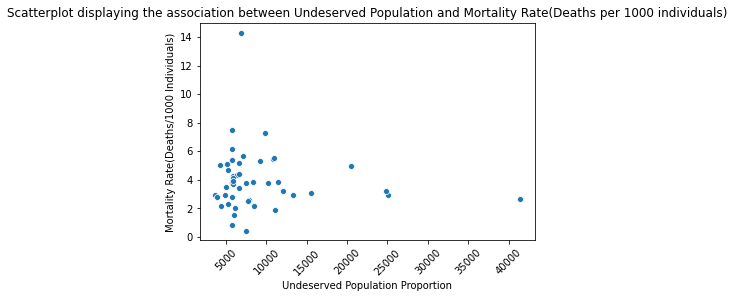

In [64]:
sns.scatterplot(merged_states_transformed['HPSAUnderservedPop'], merged_states_transformed['Mortality_Rate'])
plt.title('Scatterplot displaying the association between Undeserved Population and Mortality Rate(Deaths per 1000 individuals)')
plt.xlabel('Undeserved Population Proportion')
plt.xticks(rotation=45)
plt.ylabel('Mortality Rate(Deaths/1000 Individuals)')
sns.set(rc={'figure.figsize':(15,8.27)})

**Visualization 2**: Histogram displaying the mortality rates of all the U.S. states and U.S. territories on April 18th 2020. 

The histogram appears to be bimodal, and skewed to the right (skewed towards higher mortality rates). The histogram tells me that there is likely an outlier with a mortality rate of around 15 deaths/1000 people. I would assume that this corressponds to a state/territory with an especially large population density. 

However, most of the states/territories have morality rates between around 1.5 deaths/1000 people and 5 deaths/1000 people. 


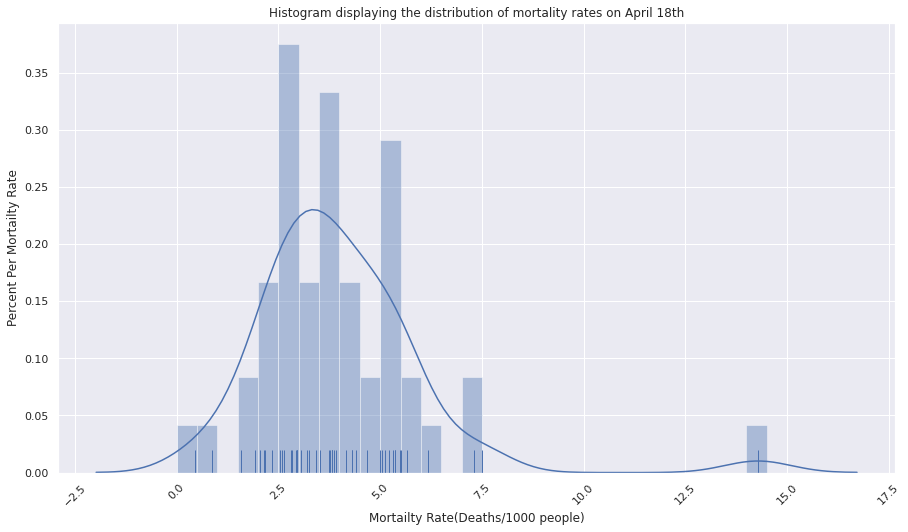

In [65]:
# People_Tested	People_Hospitalized
sns.distplot(merged_states_transformed['Mortality_Rate'], kde = True, hist = True, rug = True, bins = np.arange(0, 15, 0.5))
plt.title('Histogram displaying the distribution of mortality rates on April 18th')
plt.xlabel('Mortailty Rate(Deaths/1000 people)')
plt.xticks(rotation=45)
plt.ylabel('Percent Per Mortailty Rate')
sns.set(rc={'figure.figsize':(15,8.27)})

**Visualization 3**: Lineplot displaying the cumulative distribution function of the aggregated number of deaths over time. 

Around day 60 is when the number of deaths begins to grow exponentially, sometime around early March. This visualization indicates that we are still currently in the exponential growth portion of the logistic carrying capacity curve of the number of deaths due to cornonavirus. The deaths curve has not leveled off as of 4/18/2020.

Text(0, 0.5, 'Aggregated Number of Deaths')

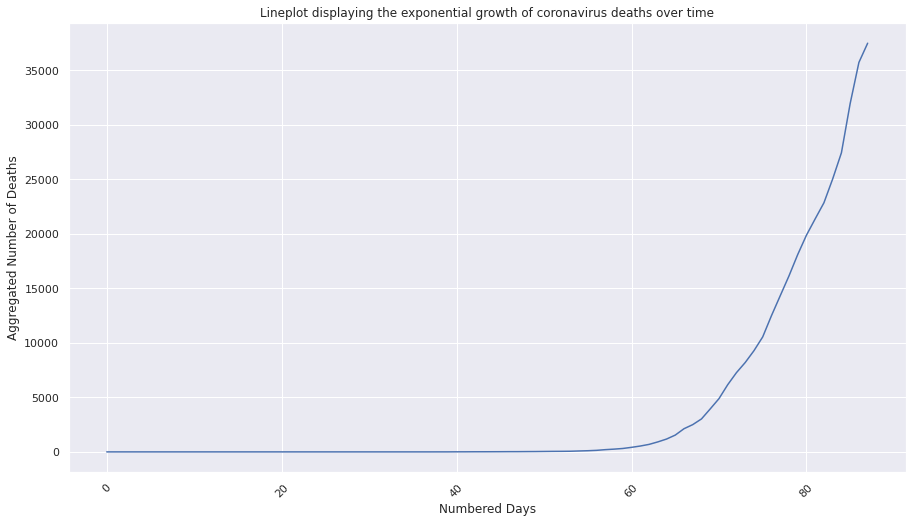

In [66]:
#Create a column called coronavirus deaths over time, and create a line plot

virus_deaths_over_time = merged_states_transformed.iloc[:, 104:192].sum()
virus_deaths_over_time = virus_deaths_over_time.reset_index().reset_index()
virus_deaths_over_time 
sns.lineplot(x = virus_deaths_over_time['level_0'], y = virus_deaths_over_time.iloc[:, 2])
plt.title('Lineplot displaying the exponential growth of coronavirus deaths over time')
plt.xlabel('Numbered Days')
plt.xticks(rotation=45)
plt.ylabel('Aggregated Number of Deaths')

**Visualization 4**: Scatterplot displaying the association between Hopspitalization Rate (explanatory variable) and Mortality Rate(response variable)

Visually, it can be observed that for the given data that we have, as the Hospitalization Rate increases, the mortality rate increases as well. This makes sense since, the more confirmed cases there are in a given state, the more are hospitalized, and the greater the mortality rate.

While we cannot conclude causation between these two variables, they do appear to be associated, so it is likely that the Undeserved population is likely to be a good predictor of the mortality rate. 

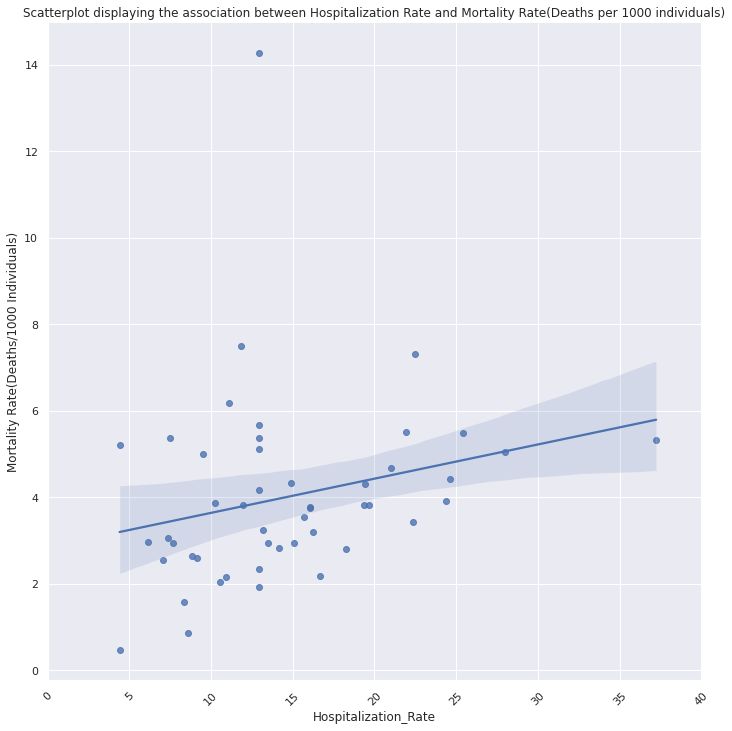

In [67]:
sns.lmplot(x = 'Hospitalization_Rate', y = 'Mortality_Rate', data = merged_states_transformed, height = 10)
plt.title('Scatterplot displaying the association between Hospitalization Rate and Mortality Rate(Deaths per 1000 individuals)')
plt.xlabel('Hospitalization_Rate')
plt.xticks(rotation=45)
plt.xlim(0, 40) 
plt.ylabel('Mortality Rate(Deaths/1000 Individuals)')
sns.set(rc={'figure.figsize':(15,8.27)})

**Visualization 5**: Plot of North America displaying the magnitude of the mortality rate among all States in the U.S. 

Visually, it can be observed that the darker the color(black), the higher the mortality rate. This may be contrary to what is expected, as we would expect midwest states with less population density to have lower mortality rates. This is compared to states on the coasts which are much more populous. However, mortality rate is agnostic of population, as larger states have more cases, but smaller less populous states have fewer cases but high mortality rate.


In [68]:
#Install the geopandas map library
pip install geopandas

     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 14.7MB 270kB/s 
     |████████████████████████████████| 10.9MB 37.2MB/s 


In [0]:

import geopandas
gdf = geopandas.GeoDataFrame(
    merged_states_transformed, geometry=geopandas.points_from_xy(merged_states_transformed['Long_'], merged_states_transformed['Lat']))


In [70]:
pip install -U mapclassify

     |████████████████████████████████| 51kB 1.7MB/s 
  Created wheel for mapclassify: filename=mapclassify-2.2.0-cp36-none-any.whl size=47028 sha256=1c6baad2c626dbefffa6d18ab1eddf544e02011ac0c81f0ef7e5b5c68e26765c
  Stored in directory: /root/.cache/pip/wheels/96/0c/c1/b2bce9fc10da2e6c6befc9fe5929adca7c71b7c4abd1fc42f0
Successfully built mapclassify


Text(0.5, 1.0, 'Map of United States depicting Mortality Rate on a scale (Darker means higher mortality rate)')

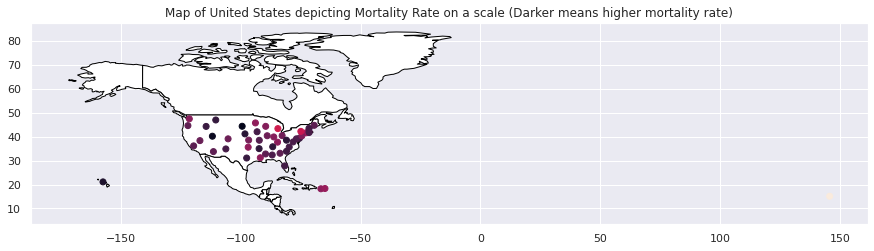

In [71]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

#  We restrict to North America.
ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black')

import mapclassify
gdf.plot(ax = ax, column='Mortality_Rate');
sns.set(rc={'figure.figsize':(15,8.27)})

plt.title('Map of United States depicting Mortality Rate on a scale (Darker means higher mortality rate)')

#Model Development + Feature Engineering Phase

**Part 1:** Perform the Train-Test Split, with 60% of data in the training split and 40% of the data in the testing split. This is important as we want to ultimately evaluate the performance of the model on the test data, after all feature engineering, feature selection, cross validation accuracy etc. has been completed.

However, I will not examine the test data until the very end, so as to not bias my model development process in favor of improving model accuracy on the test split. 

The merged_states_standardized table will be used in the Model Development Phase

In [0]:
# #Select the features of interest using the feature selection pipeline

def feature_selection_pipeline(table, features, label):
  table = table[features]
  y = table[label]
  X = table.drop(columns = [label])
  return X, y

features = ['PopMale5-92010',	
            'PopFmle5-92010',
            'PopMale10-142010',	
            'PopFmle10-142010',
            'PopMale65-742010',
            'PopFmle65-742010',
            'PopMale75-842010',
            'PopFmle75-842010',
            'DiabetesPercentage',
            'Smokers_Percentage',
            'HeartDiseaseMortality',
            'StrokeMortality',
            'RespMortalityRate2014',
            'Hospitalization_Rate',
            'People_Tested',
            'Mortality_Rate']
X, y = feature_selection_pipeline(merged_states_standardized, features, 'Mortality_Rate')


In [0]:
#Perform the train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

**Part 2:** Build the baseline linear regression model, regression tree, and random forest of regression trees models with the set of features chosen, and calculate the MSE for each. Additionally, for each model, perform bootstrap cross validation accuracy to evaluate how the model would perform on unseen data. The reason why bootstrap cross validation accuracy is being employed rather than k-fold cross validation accuracy is the size of the dataset. There are about only 50 rows, and thus the splits will have too much natural variability. 

In [0]:
#mean squared error function

def MeanSquaredError(actual, predicted):
  return np.mean((actual-predicted)**2)


#Cross validation accuracy for regression model

from sklearn.model_selection import KFold
from sklearn.base import clone

def cross_validate_mse_bootstrap(model, k_iter, features):
    table_sample = 0
    mse = []
    mse_error = 0
    for i in range(k_iter):
      table_sample = merged_states_standardized.sample(frac=1, replace=True, random_state=i)
      X, y = feature_selection_pipeline(table_sample, features, 'Mortality_Rate')
      X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.40, random_state=42)
      the_model = model()
      the_model.fit(X_train, y_train)
      training_predictions = the_model.predict(X_val)
      actual_values = y_val
      mse_error = MeanSquaredError(actual_values, training_predictions)
      mse.append(mse_error)
    print("The variance of the errors is", np.var(mse))
    print("The average of the errors is", np.mean(mse))
    return np.mean(mse)



In [75]:
#Building the Baseline Linear Regression Model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

training_predictions_linreg = regression_model.predict(X_train)
actual_values = y_train

print("The mean squared error for the Linear Regression Model is:", MeanSquaredError(actual_values, training_predictions_linreg))

linalg_original_mse = cross_validate_mse_bootstrap(LinearRegression, 30, features)



The mean squared error for the Linear Regression Model is: 0.16869666922961474
The variance of the errors is 17.38126487740508
The average of the errors is 1.8371297596968204


In [76]:
#Building Baseline Regression Tree Model
#Regression Tree Models tend to overfit to the training data, and fail to generalize well to unseen data.
#One benefit of Regression Trees is it tends to work well for small datasets, as in this case where there
#are only 50 records(rows)

from sklearn.tree import DecisionTreeRegressor

decision_tree_regression = DecisionTreeRegressor(random_state=0)
decision_tree_regression.fit(X_train, y_train)

training_predictions_dtree = decision_tree_regression.predict(X_train)
actual_values = y_train

print("The mean squared error for the Decision Tree Regressor is:", MeanSquaredError(actual_values, training_predictions_dtree))
regression_tree_original_mse = cross_validate_mse_bootstrap(DecisionTreeRegressor, 20, features)


The mean squared error for the Decision Tree Regressor is: 0.0
The variance of the errors is 0.04794448621696601
The average of the errors is 0.38441186807601907


As you can see above, the decision tree tends to get 100% accuracy on the training set(in this case 0 root mean squared error), as it tends to overfit to the training set.

In [77]:
#Since ordinary decision trees tend to overfit to the training dataset, and thus lead there to be low bias and high variance,
#random forest ensemble combines the multiple decision trees overfitting to multiple bagged(boostrapped) samples of the data
#to capture the variability in the data, leading to low variance.

from sklearn.ensemble import RandomForestRegressor

random_forest_regression = RandomForestRegressor(random_state=0)
random_forest_regression.fit(X_train, y_train)

training_predictions_random_forest = random_forest_regression.predict(X_train)
actual_values = y_train

print("The mean squared error for the Random Forest Regressor is:", MeanSquaredError(actual_values, training_predictions_random_forest))
random_forest_original_mse = cross_validate_mse_bootstrap(RandomForestRegressor, 30, features)



The mean squared error for the Random Forest Regressor is: 0.07006550516282674
The variance of the errors is 0.03399226236723881
The average of the errors is 0.27321129196306004


Currently, for all three models above, the variance and mean are approximately equal. This is concerning as this indicates that the model may overfitting to the training dataset, and failing to generalize well to the unseen data.

Particularly, small changes in the unseen data that deviate (in terms of the noise) from the training set lead to large changes in the accuracy. In other words, these models have low bias and high variance.

Thus, feature selection in the next step is important, as it will help narrow down on only the most essential features, to ensure that model complexity isn't too high. Particularly, the size of the dataset is only around 50, so narrowing down on only the essential features will greatly improve the accuracy.

**Part 3**: Perform Feature Selection to Enhance Model Performance




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


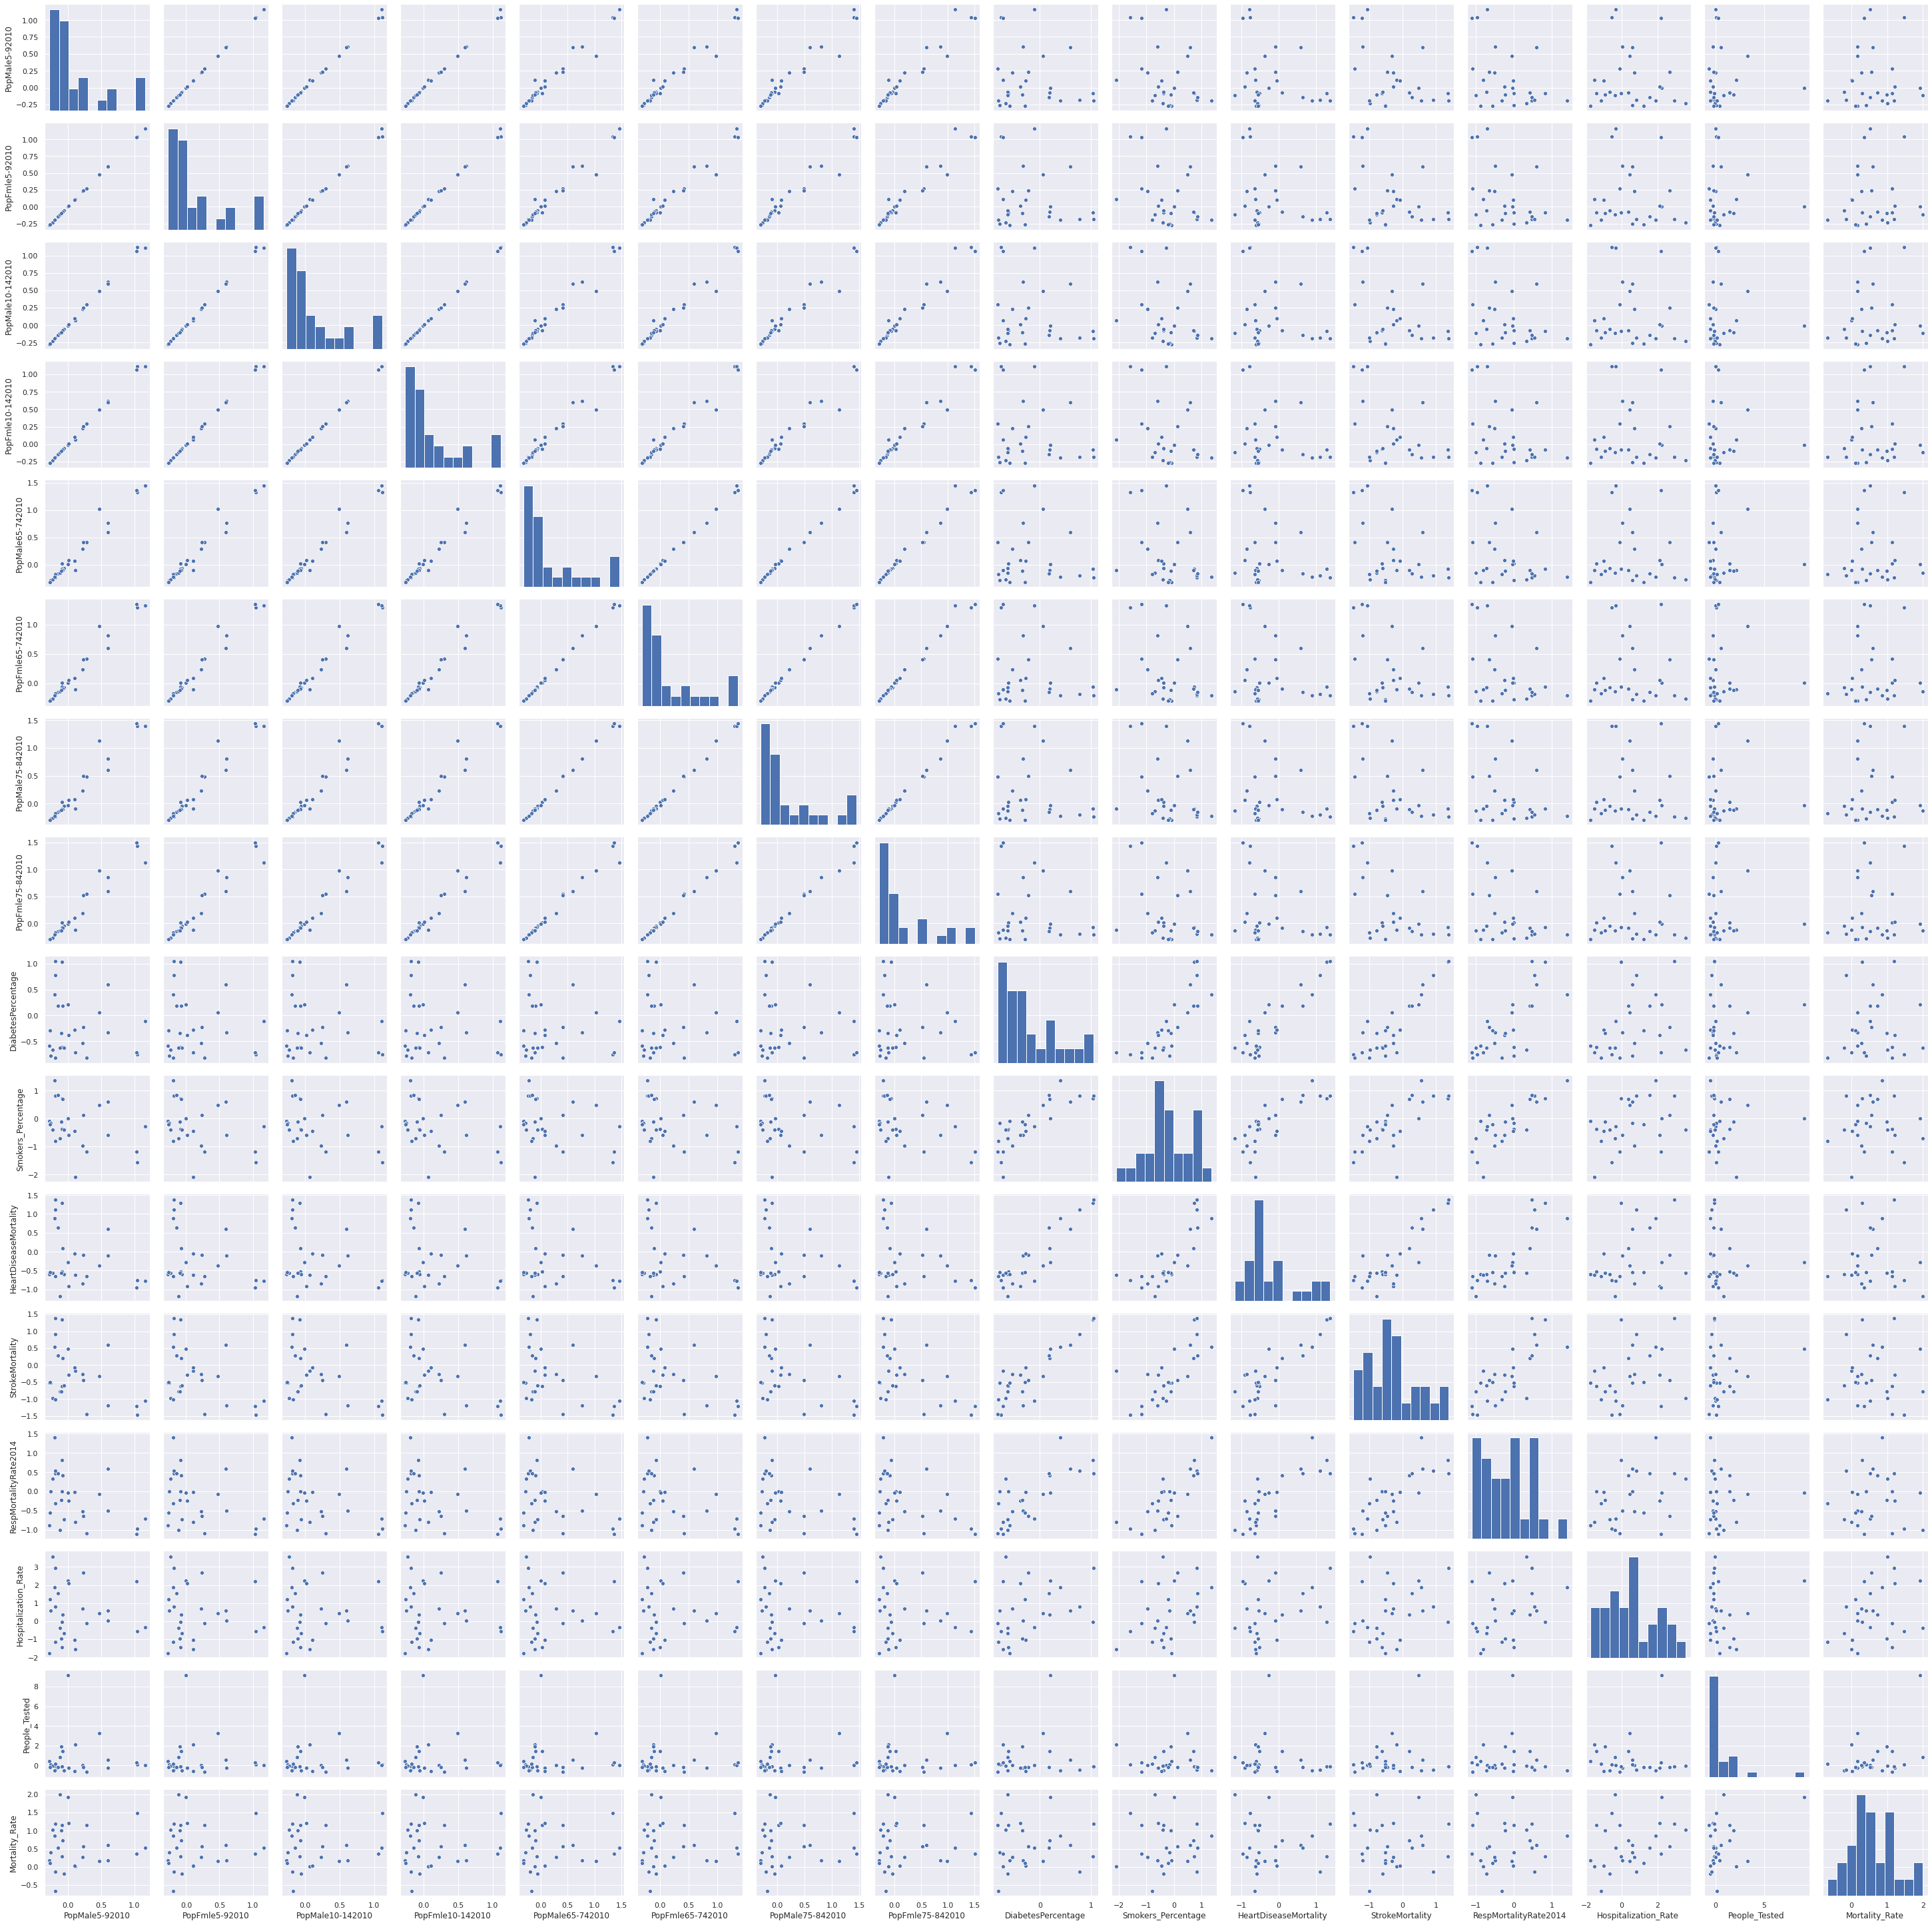

In [0]:
#Let's create a pairplot to examine associations between the quantitative continuous features
X_train['Mortality_Rate'] = y_train
sns.pairplot(X_train)

The pairplot above tells me that HeartDiseaseMortality, StrokeMortality, and RespMortalityRate2014 features have no association with the Mortality_Rate strangely. 

Earlier, I had expected that HeartDiseaseMortality, StrokeMortality, and RespMortalityRate2014 features would be significantly correlated with the mortality rate, but they aren't according to these scatterplots. This tells me that these mortalities are independent of covid-19 specific mortalities. Thus, these features will be removed from the final model.

Furthermore, the populations of particular age group features appear to be redundant. To be able to underscore the difference between age groups further, it may be better to include the PopMale5-92010, PopFmle-5-92010, PopMale75-842010, and PopFmle75-842010, and leave out the others. 

The rest of the features appear to be associated with the response.

Let's create another pairplot to understand features(specifically pertaining to features not considered earlier such as Deaths, Confirmed Cases etc.)

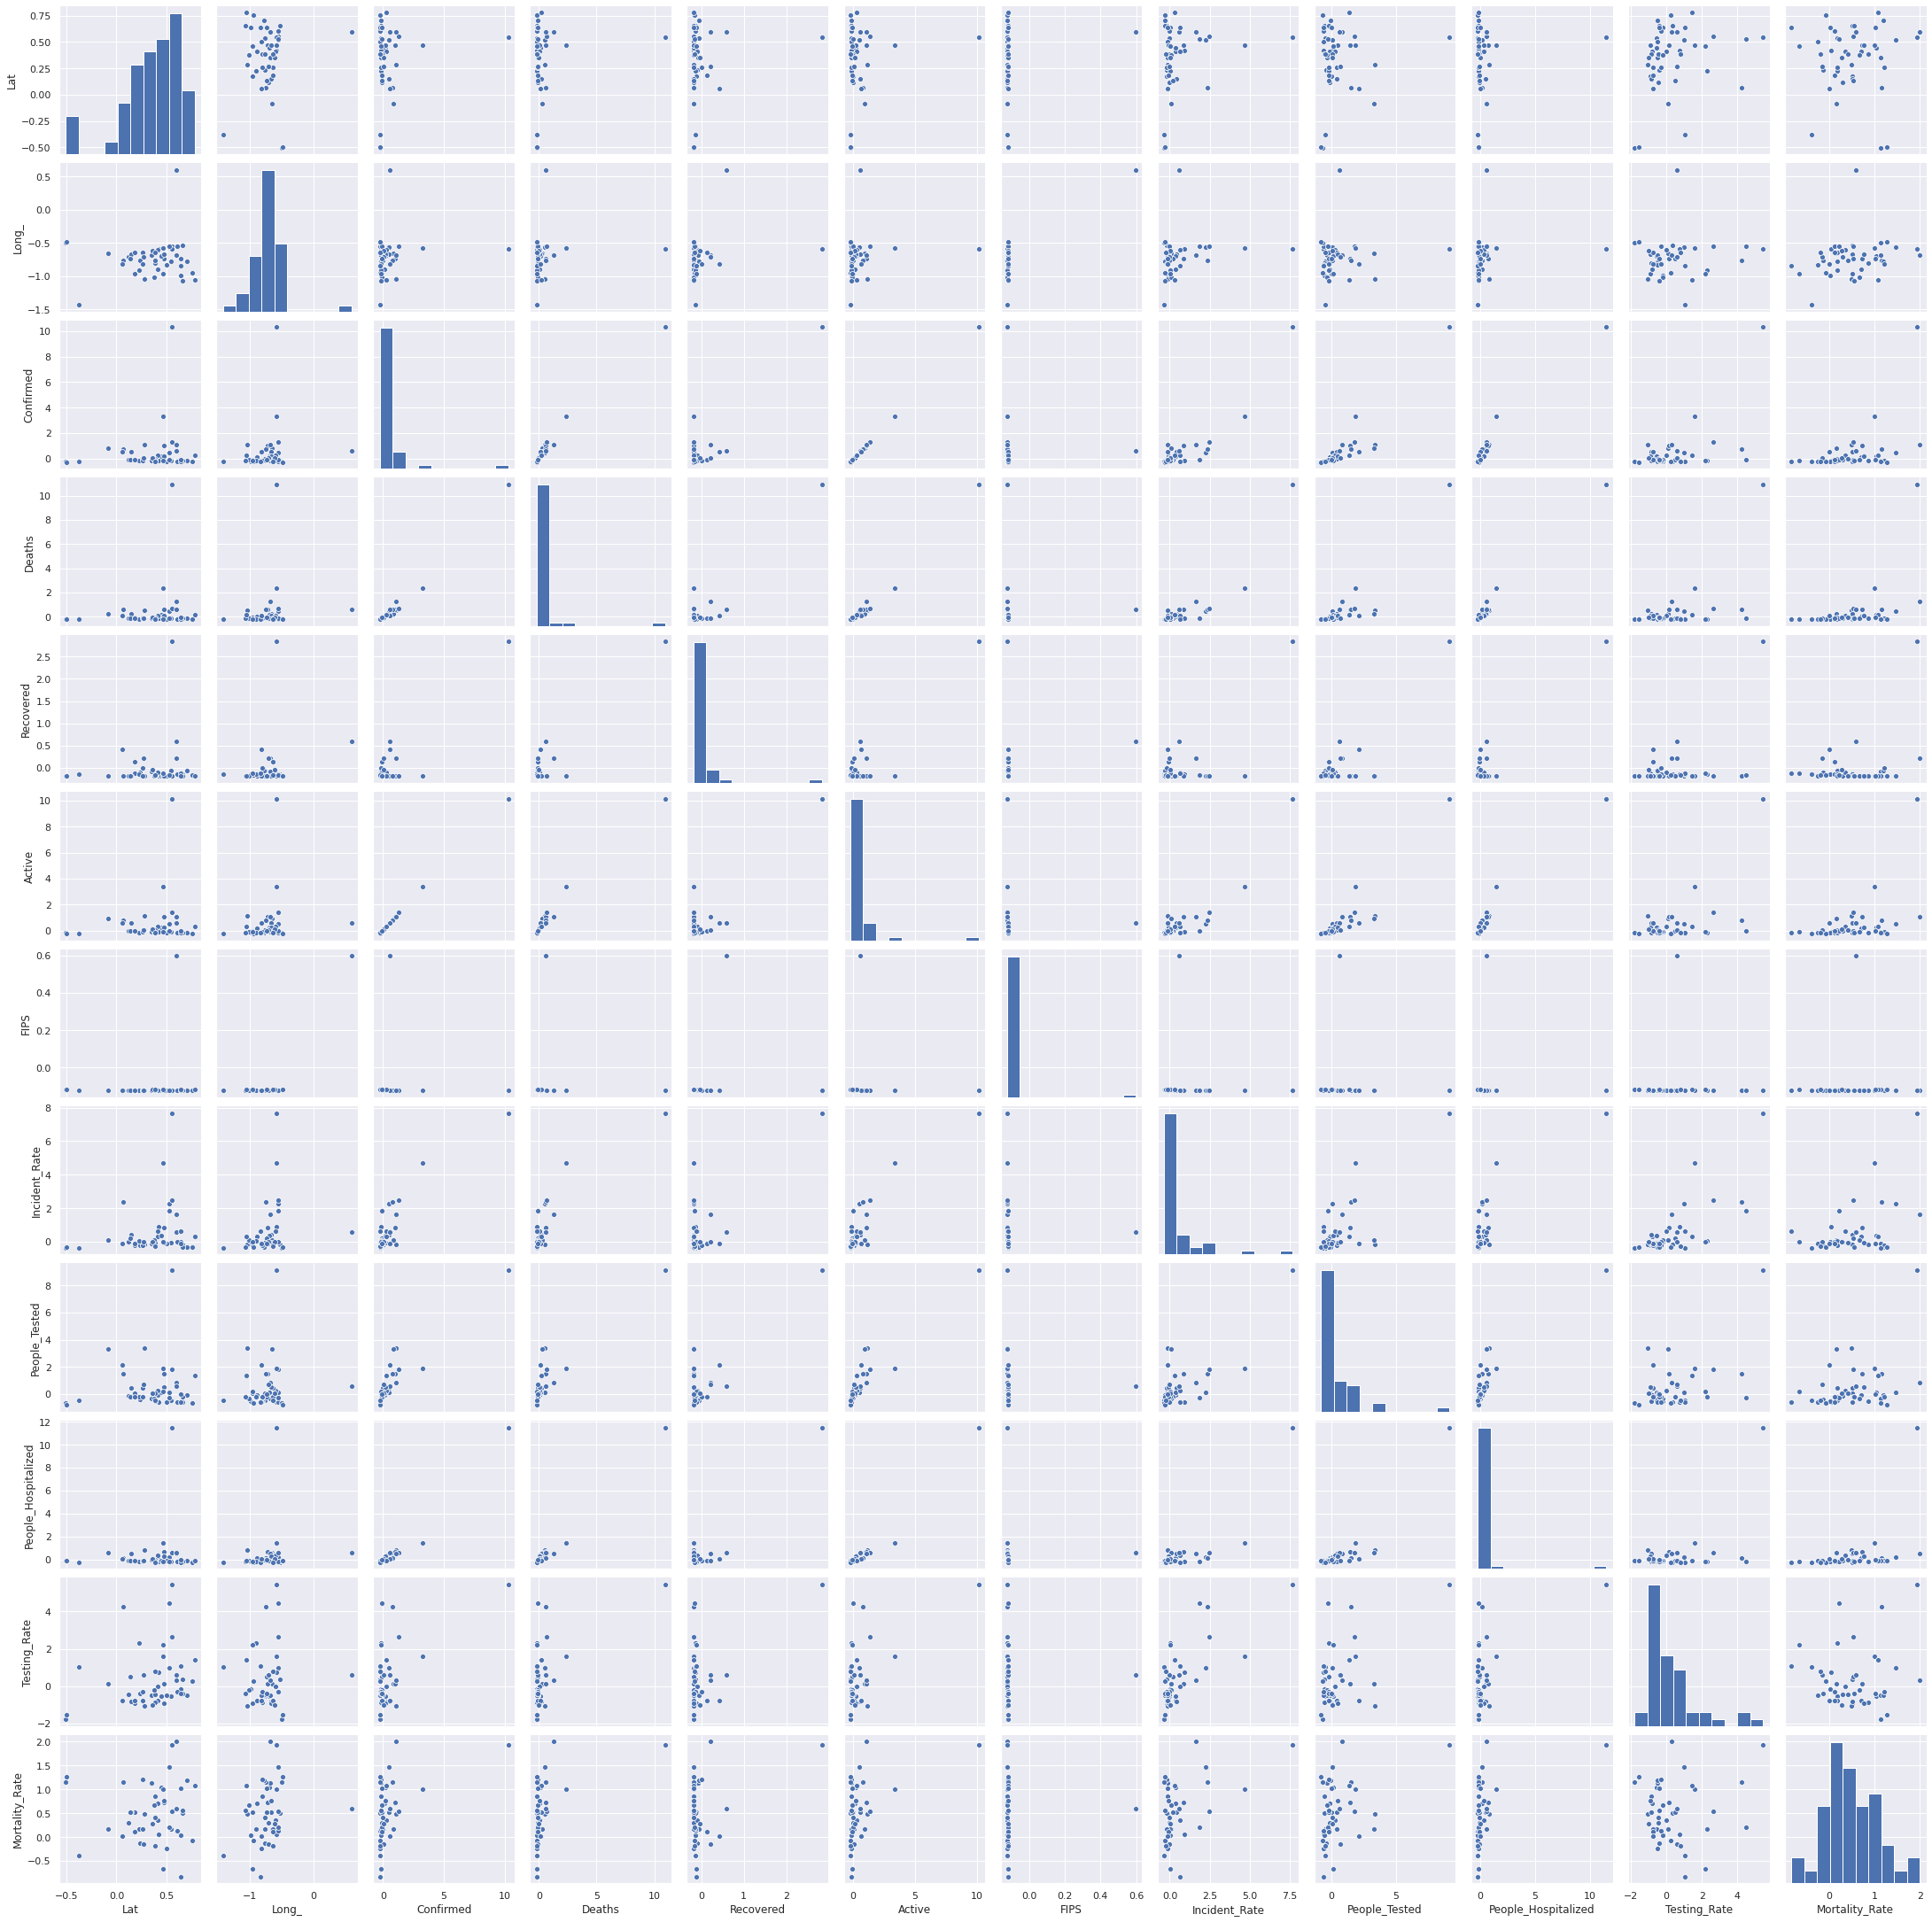

In [0]:
#Another pairplot depicting features not considered originally.
features = ['Lat',	
            'Long_',
            'Confirmed',	
            'Deaths',	
            'Recovered',
            'Active',
            'FIPS',	
            'Incident_Rate',
            'People_Tested',	
            'People_Hospitalized',
            'Testing_Rate',
            'Mortality_Rate']

X_pairplot, y_pairplot = feature_selection_pipeline(merged_states_standardized, features, 'Mortality_Rate')
X_pairplot['Mortality_Rate'] = y_pairplot
sns.pairplot(X_pairplot)

Based on this pairplot, Long_, Confirmed, Deaths, Incident_Rate, and People_Tested features area associated with the response variable which is the Mortality_Rate. 

Amongst the associated features, Long_, People_Tested, and Incident_Rate are the most strongly associated, so these features will be added to the original list of features. Now, let's build the enhanced models with specific feature selection, and compare the accuracies to before.

**Part 4:** Build models with specifically selected features during feature selection

In [0]:
final_features = [
            'Mortality_Rate',
            'PopMale5-92010',	
            'PopFmle5-92010',
            'PopMale75-842010',
            'PopFmle75-842010',
            'DiabetesPercentage',
            'Smokers_Percentage',
            'Long_',
            'Hospitalization_Rate',
            'People_Tested',
            'Incident_Rate'
            ]

X_final, y_final = feature_selection_pipeline(merged_states_standardized, final_features, 'Mortality_Rate')

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final, test_size=0.40, random_state=42)

In [79]:
#Linear Regression Model After Feature Selection
regression_model_final = LinearRegression()
regression_model_final.fit(X_train_final, y_train_final)

training_predictions_linreg_feat_selec = regression_model_final.predict(X_train_final)
actual_values = y_train_final
print("The mean squared error for the Linear Regression Model is:", MeanSquaredError(actual_values, training_predictions_linreg_feat_selec))
linalg_final_mse = cross_validate_mse_bootstrap(LinearRegression, 30, final_features)

The mean squared error for the Linear Regression Model is: 0.15430819478542315
The variance of the errors is 1.0858116105794842
The average of the errors is 0.6053297937861216


Clearly, the root mean squared error for the regression model went down from 0.

In [80]:
#Regression Tree Model After Feature Selection
#Regression Tree Models tend to overfit to the training data, and fail to generalize well to unseen data.
#One benefit of Regression Trees is it tends to work well for small datasets, as in this case where there
#are only 50 records(rows)

from sklearn.tree import DecisionTreeRegressor

decision_tree_regression_final = DecisionTreeRegressor(random_state=0)
decision_tree_regression_final.fit(X_train_final, y_train_final)

training_predictions_dtree_final = decision_tree_regression_final.predict(X_train_final)
actual_values = y_train_final

print("The mean squared error for the Decision Tree Regressor is:", MeanSquaredError(actual_values, training_predictions_dtree_final))
regression_tree_final_mse = cross_validate_mse_bootstrap(DecisionTreeRegressor, 30, final_features)


The mean squared error for the Decision Tree Regressor is: 0.0
The variance of the errors is 0.03499827051203105
The average of the errors is 0.3134319785458988


**Part 5** Calculate and Examine the Improvements in the models after feature selection. Additionally, evaluate the performance of the models on the test data.

In [81]:
#Final Random Forest Regressor Model

#Since ordinary decision trees tend to overfit to the training dataset, and thus lead there to be low bias and high variance,
#random forest ensemble combines the multiple decision trees overfitting to multiple bagged(boostrapped) samples of the data
#to capture the variability in the data, leading to low variance.

from sklearn.ensemble import RandomForestRegressor

random_forest_regression_final = RandomForestRegressor(random_state=0)
random_forest_regression_final.fit(X_train_final, y_train_final)

training_predictions_random_forest_fin = random_forest_regression_final.predict(X_train_final)
actual_values = y_train_final

print("The mean squared error for the Random Forest Regressor is:", MeanSquaredError(actual_values, training_predictions_random_forest))
random_forest_final_mse = cross_validate_mse_bootstrap(RandomForestRegressor, 30, final_features)



The mean squared error for the Random Forest Regressor is: 0.07006550516282674
The variance of the errors is 0.019842762057608578
The average of the errors is 0.2341100247483774


In [83]:
#Linear Regression Model (Average) Percent Error Reduction:

lin_reg_error_reduction = 100*((linalg_final_mse-linalg_original_mse)/linalg_original_mse)
print("Linear Regression Model Percent Error Reduction: ", lin_reg_error_reduction, "%")

#Regression Tree Model Percent Error Reduction:

reg_tree_error_reduction = 100*((regression_tree_final_mse-regression_tree_original_mse)/regression_tree_original_mse)
print("Regression Tree Model Percent Error Reduction: ", reg_tree_error_reduction, "%")

#Random Forest of Regression Trees Model Percent Error Reduction:

random_forest_error_reduction = 100*((random_forest_final_mse-random_forest_original_mse)/random_forest_original_mse)
print("Random Forest of Regression Trees Model Percent Error Reduction: ", random_forest_error_reduction, "%")

Linear Regression Model Percent Error Reduction:  -67.05024288071961 %
Regression Tree Model Percent Error Reduction:  -18.464541660842706 %
Random Forest of Regression Trees Model Percent Error Reduction:  -14.31173174934856 %


**Part 5:** Evaluate the Performance of the Models on the Test Set

In [85]:
#Evaluate Linear Regression Model on the Test Set

lin_reg_test_set_predictions = regression_model_final.predict(X_test_final)
lin_reg_test_set_error = MeanSquaredError(y_test_final, lin_reg_test_set_predictions)
print("Linear Regression Model Test Set Error: ", lin_reg_test_set_error)

# #Evaluate Regression Tree Model on the Test Set

reg_tree_test_set_predictions = decision_tree_regression_final.predict(X_test_final)
reg_tree_test_set_error = MeanSquaredError(y_test_final, reg_tree_test_set_predictions)
print("Regression Tree Model Test Set Error: ", reg_tree_test_set_error)


# #Evaluate Random Forest of Regression Trees Model on the Test Set

random_forest_reg_tree_test_set_predictions = random_forest_regression_final.predict(X_test_final)
random_forest_reg_tree_test_set_error = MeanSquaredError(y_test_final, random_forest_reg_tree_test_set_predictions)
print("Random Forest of Regression Trees Model Test Set Error: ", random_forest_reg_tree_test_set_error)

Linear Regression Model Test Set Error:  0.3461902049653014
Regression Tree Model Test Set Error:  0.4291695606635044
Random Forest of Regression Trees Model Test Set Error:  0.2880493911874899


**Conclusion**

In conclusion, the Linear Regression Model, Regression Tree Model, and the Random Forest of Regression Trees Model acheived low mean squared errors of 
0.34619, 0.429169, 0.28805 respectively on the test set. This is for predicting the quantitative continuous value of mortality rate of a given state in the United States